# NGC 6402 Analysis

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
import calibration
import analysis_routines
import variables
import glob
import re
from astropy.stats import sigma_clip
%matplotlib inline 

In [2]:
target = 'NGC6402'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '17:37:36.10'
cluster_dec = '-03:14:45.3'

## Cluster Snapshot

In [3]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(folder+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(folder+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

#### Plot AOR footprint

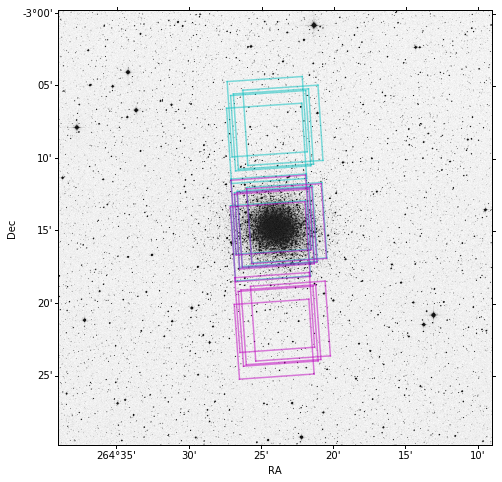

In [4]:
from matplotlib.colors import LogNorm
hdu = fits.open(folder+'dss-'+target+'.fits')[0]
wcs = WCS(hdu.header)
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
mp.imshow(hdu.data, origin='lower', cmap='gray_r')#, norm=LogNorm())

for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [3.6] AOR footprint
  #  mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
for ind, fits_file in enumerate(ch2_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [4.5] AOR footprint
  #  mp.plot(ch2_data['ra'][ind], ch2_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

#### Map of source catalog with field boundaries shown

Reading optical catalog for NGC6402...
Finished reading optical catalog.


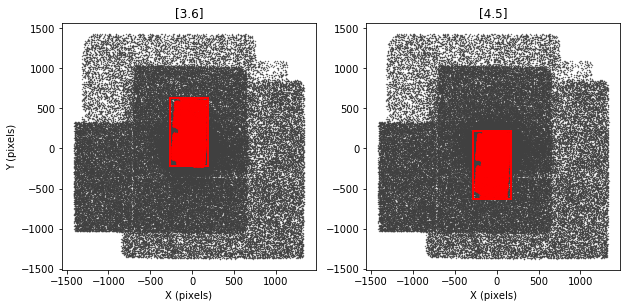

In [9]:
fig = mp.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# read optical catalog and add to plots
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)
ax1.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax2.plot(xcat, ycat, '.', color='0.25', markersize=0.75)

# read boundaries of IRAC data
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
I1cuts = np.loadtxt(folder+'DeepMosaic/I1-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I2cuts = np.loadtxt(folder+'DeepMosaic/I2-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymin']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymax'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmin']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmax'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')
ax1.set_title('[3.6]')
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymin']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymax'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmin']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmax'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.set_xlabel('X (pixels)')
ax2.set_title('[4.5]')


# Add transformed catalogs
I1ids, I1x, I1y, I1mag, I1err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I1_deep_dn.alf')
I2ids, I2x, I2y, I2mag, I2err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I2_deep_dn.alf')

filesI1, x_offI1, y_offI1, transformI1, dofI1 = read_dao.read_mch(folder+'DeepMosaic/op-I1-deep.mch')
filesI2, x_offI2, y_offI2, transformI2, dofI2 = read_dao.read_mch(folder+'DeepMosaic/op-I2-deep.mch')

xI1 = float(x_offI1[1])+float(transformI1[1][0])*I1x+float(transformI1[1][1])*I1y
yI1 = float(y_offI1[1])+float(transformI1[1][2])*I1x+float(transformI1[1][3])*I1y
xI2 = float(x_offI2[1])+float(transformI2[1][0])*I2x+float(transformI2[1][1])*I2y
yI2 = float(y_offI2[1])+float(transformI2[1][2])*I2x+float(transformI2[1][3])*I2y

ax1.plot(xI1, yI1, '.', markersize=1.8, color='r')
ax2.plot(xI2, yI2, '.', markersize=1.8, color='r')


mp.show()

# Calibration

In [3]:
calibration.find_lst_stars(target, 'I1', data_dir=folder)
calibration.find_lst_stars(target, 'I2', data_dir=folder)

[70444] []
[67659] [67411 68068]
[67307] [67561]
[68139] [67788]
[66326] []
[67773] [67479]
[65231] [65694 65283]
[65121] []
[62926] [63279]
[62695] []
[59958] []
[56411] [56865]
[57628] []
[54297] [54830]
[53490] []
[53525] []
[53778] []
[49729] [50042]
[49240] []
[46782] [46688]
[46059] []
[43607] [43282 44127]
[44124] []
[42862] [43269]
[40976] [40975]
[41448] [41945]
[39887] []
[38500] [38068]
[66451] [66875 66722]
[68006] [68182]
[64086] [63641 63880]
[62826] []
[65131] [64634 64718 65068 64988 65056 65366 64844 65516 64705 64884]
[61979] [61216]
[57136] [57022]
[55911] [55748]
[56553] [56972]
[52537] [52618]
[53077] [53349]
[57249] [57344 56922 57094 57764]
[56238] [56424 56265 55789 56157 55760 56700 55930 55673 56144 56675 56587]
[50365] [50189]
[51465] [51143]
[49548] []
[47164] [47463 47314]
[46019] [46094]
[44833] []
[41467] [41895]
[43922] [44062 44256 44276 44306]
[39077] []
[39534] [39241 39370 39893 39204 39297 39064 39704 39357 39510 39707]
[36170] [36066]


In [5]:
calibration.do_ap_phot(target, 'I1', 30, data_dir=folder, dao_dir='/usr/local/phot/')
calibration.do_ap_phot(target, 'I2', 30, data_dir=folder, dao_dir='/usr/local/phot/')
# ap phot failing in ch2


  READ NOISE (ADU; 1 frame) =     3.95        GAIN (e-/ADU; 1 frame) =     3.70
 LOW GOOD DATUM (in sigmas) =    10.00      HIGH GOOD DATUM (in ADU) = 30000.00
             FWHM OF OBJECT =     2.00         THRESHOLD (in sigmas) =     6.00
  LS (LOW SHARPNESS CUTOFF) =     0.30    HS (HIGH SHARPNESS CUTOFF) =     1.40
  LR (LOW ROUNDNESS CUTOFF) =    -1.00    HR (HIGH ROUNDNESS CUTOFF) =     1.00
             WATCH PROGRESS =    -1.00                FITTING RADIUS =     2.00
                 PSF RADIUS =     9.00                  VARIABLE PSF =     0.00
              SKY ESTIMATOR =     0.00            ANALYTIC MODEL PSF =     2.00
  EXTRA PSF CLEANING PASSES =     5.00       USE SATURATED PSF STARS =     0.00
       PERCENT ERROR (in %) =     0.75          PROFILE ERROR (in %) =     5.00

 Command: at NGC6402:I1_46765824_01.fits
at NGC6402:I1_46765824_01.fits

     NGC6402:I1_46765824_01...               


                                      Picture size:    256   256


 Command: 

 PHO> 


 Input position file (default 
                       NGC6402:I1_46765824_08.coo): 

   Output file (default NGC6402:I1_46765824_08.ap): 


 Command: at NGC6402:I1_46765824_09.fits
at NGC6402:I1_46765824_09.fits

     NGC6402:I1_46765824_09...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I1_46766336_05.coo): 

   Output file (default NGC6402:I1_46766336_05.ap): 


 Command: at NGC6402:I1_46766336_06.fits
at NGC6402:I1_46766336_06.fits

     NGC6402:I1_46766336_06...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I1_46766848_02.coo): 

   Output file (default NGC6402:I1_46766848_02.ap): 


 Command: at NGC6402:I1_46766848_03.fits
at NGC6402:I1_46766848_03.fits

     NGC6402:I1_46766848_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I1_46767104_09.coo): 

   Output file (default NGC6402:I1_46767104_09.ap): 


 Command: at NGC6402:I1_46767104_10.fits
at NGC6402:I1_46767104_10.fits

     NGC6402:I1_46767104_10...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 

                       NGC6402:I1_46767616_06.coo): 
   Output file (default NGC6402:I1_46767616_06.ap): 


 Command: at NGC6402:I1_46767616_07.fits
at NGC6402:I1_46767616_07.fits

     NGC6402:I1_46767616_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I1_46817024_03.coo): 

   Output file (default NGC6402:I1_46817024_03.ap): 


 Command: at NGC6402:I1_46817024_04.fits
at NGC6402:I1_46817024_04.fits

     NGC6402:I1_46817024_04...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I1_46817536_10.coo): 

   Output file (default NGC6402:I1_46817536_10.ap): 


 Command: at NGC6402:I1_46818048_01.fits
at NGC6402:I1_46818048_01.fits

     NGC6402:I1_46818048_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

                       NGC6402:I2_46765824_04.coo): 

   Output file (default NGC6402:I2_46765824_04.ap): 


 Command: at NGC6402:I2_46765824_05.fits
at NGC6402:I2_46765824_05.fits

     NGC6402:I2_46765824_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC

 PHO> 


 Input position file (default 
                       NGC6402:I2_46765824_08.coo): 

   Output file (default NGC6402:I2_46765824_08.ap): 


 There aren't enough pixels in the sky annulus for star

       66451
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       64086
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       62826
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       61979
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       57136
  Are you sure your bad pixel thresholds are all right?
  If so,

 Command: at NGC6402:I2_46766080_01.fits
at NGC6402:I2_46766080_01.fits

     NGC6402:I2_46766080_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46766080_01.coo): 

   Output file (default NGC6402:I2_46766080_01.ap): 


 Command: at NGC6402:I2_46

at NGC6402:I2_46766080_07.fits

     NGC6402:I2_46766080_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46766080_07.coo): 

   Output file (default NGC6402:I2_46766080_07.ap): 


 There aren't enough pixels in the sky annulus for star

       62

  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       49548
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       47164
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       46019
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       44833
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       41467
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.

 PHO> 


 Input position file (default 
                       NGC6402:I2_46766336_08.coo): 

   Output file (default NGC6402:I2_46766336_08.ap): 


 There aren't enough pixels in the sky annulus for star

       66451
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       64086
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       62826
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       61979
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       57136
  Are you sure your bad pixel thresholds are all right?
  If so,

 Command: at NGC6402:I2_46766592_01.fits
at NGC6402:I2_46766592_01.fits

     NGC6402:I2_46766592_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46766592_01.coo): 

   Output file (default NGC6402:I2_46766592_01.ap): 


 Command: at NGC6402:I2_46

at NGC6402:I2_46766592_07.fits

     NGC6402:I2_46766592_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46766592_07.coo): 

   Output file (default NGC6402:I2_46766592_07.ap): 


 There aren't enough pixels in the sky annulus for star

       62


 There aren't enough pixels in the sky annulus for star

       56553
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       53077
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       50365
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       49548
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       47164
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       46019
  Are you sure your bad pixel thr

 PHO> 


 Input position file (default 
                       NGC6402:I2_46766848_04.coo): 

   Output file (default NGC6402:I2_46766848_04.ap): 


 Command: at NGC6402:I2_46766848_05.fits
at NGC6402:I2_46766848_05.fits

     NGC6402:I2_46766848_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I2_46766848_08.coo): 

   Output file (default NGC6402:I2_46766848_08.ap): 


 There aren't enough pixels in the sky annulus for star

       66451
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       64086
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       62826
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       61979
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       57136
  Are you sure your bad pixel thresholds are all right?
  If so,

 There aren't enough pixels in the sky annulus for star

       44833
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 Command: at NGC6402:I2_46767104_01.fits
at NGC6402:I2_46767104_01.fits

     NGC6402:I2_46767104_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.

 Command: at NGC6402:I2_46767104_07.fits
at NGC6402:I2_46767104_07.fits

     NGC6402:I2_46767104_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46767104_07.coo): 

   Output file (default NGC6402:I2_46767104_07.ap): 


 There aren't enough pixel

  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       50365
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       49548
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       47164
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       46019
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       44833
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.

 PHO> 


 Input position file (default 
                       NGC6402:I2_46767360_04.coo): 

   Output file (default NGC6402:I2_46767360_04.ap): 


 Command: at NGC6402:I2_46767360_05.fits
at NGC6402:I2_46767360_05.fits

     NGC6402:I2_46767360_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I2_46767360_08.coo): 

   Output file (default NGC6402:I2_46767360_08.ap): 


 There aren't enough pixels in the sky annulus for star

       66451
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       64086
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       62826
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       61979
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       57136
  Are you sure your bad pixel thresholds are all right?
  If so,

 Command: at NGC6402:I2_46767616_01.fits
at NGC6402:I2_46767616_01.fits

     NGC6402:I2_46767616_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46767616_01.coo): 

   Output file (default NGC6402:I2_46767616_01.ap): 


 Command: at NGC6402:I2_46

at NGC6402:I2_46767616_07.fits

     NGC6402:I2_46767616_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46767616_07.coo): 

   Output file (default NGC6402:I2_46767616_07.ap): 


 There aren't enough pixels in the sky annulus for star

       62

  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       53077
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       50365
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       49548
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       47164
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       46019
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.

 PHO> 


 Input position file (default 
                       NGC6402:I2_46767872_04.coo): 

   Output file (default NGC6402:I2_46767872_04.ap): 


 Command: at NGC6402:I2_46767872_05.fits
at NGC6402:I2_46767872_05.fits

     NGC6402:I2_46767872_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I2_46767872_08.coo): 

   Output file (default NGC6402:I2_46767872_08.ap): 


 There aren't enough pixels in the sky annulus for star

       66451
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       64086
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       62826
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       61979
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       57136
  Are you sure your bad pixel thresholds are all right?
  If so,

 Command: at NGC6402:I2_46817024_01.fits
at NGC6402:I2_46817024_01.fits

     NGC6402:I2_46817024_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46817024_01.coo): 

   Output file (default NGC6402:I2_46817024_01.ap): 


 Command: at NGC6402:I2_46

at NGC6402:I2_46817024_07.fits

     NGC6402:I2_46817024_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46817024_07.coo): 

   Output file (default NGC6402:I2_46817024_07.ap): 


 There aren't enough pixels in the sky annulus for star

       62

  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       50365
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       49548
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       47164
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       46019
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       44833
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.

 PHO> 


 Input position file (default 
                       NGC6402:I2_46817536_04.coo): 

   Output file (default NGC6402:I2_46817536_04.ap): 


 Command: at NGC6402:I2_46817536_05.fits
at NGC6402:I2_46817536_05.fits

     NGC6402:I2_46817536_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6402:I2_46817536_08.coo): 

   Output file (default NGC6402:I2_46817536_08.ap): 


 There aren't enough pixels in the sky annulus for star

       66451
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       64086
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       62826
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       61979
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       57136
  Are you sure your bad pixel thresholds are all right?
  If so,

 Command: at NGC6402:I2_46818048_01.fits
at NGC6402:I2_46818048_01.fits

     NGC6402:I2_46818048_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46818048_01.coo): 

   Output file (default NGC6402:I2_46818048_01.ap): 


 Command: at NGC6402:I2_46

at NGC6402:I2_46818048_07.fits

     NGC6402:I2_46818048_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC6402:I2_46818048_07.coo): 

   Output file (default NGC6402:I2_46818048_07.ap): 


 There aren't enough pixels in the sky annulus for star

       62

  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       50365
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       49548
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       47164
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       46019
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.


 There aren't enough pixels in the sky annulus for star

       44833
  Are you sure your bad pixel thresholds are all right?
  If so, then you need a larger outer sky radius.

read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_06.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_06.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_07.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_07.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_09.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_09.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_10.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46765824_10.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46766080_06.ap"
read_dao.py

read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46817536_09.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46817536_09.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46817536_10.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46817536_10.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46818048_06.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46818048_06.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46818048_07.ap"
read_dao.py:116: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46818048_07.coo"
read_dao.py:32: UserWarning: loadtxt: Empty input file: "/Volumes/Annie/CRRP/NGC6402/data/I1_46818048_09.ap"
read_dao.py

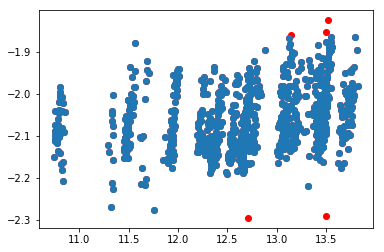

-2.06214184397 0.0687051476007
-2.06058561297 0.0688186574607
There are 28 psf stars.


calibration.py:338: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 66344 but corresponding boolean dimension is 992
  x = obs_num[names == star]


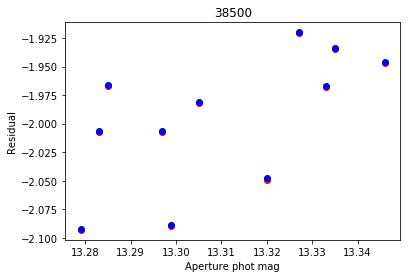

0.067 0.141
0.022297388944 0.0463167320676


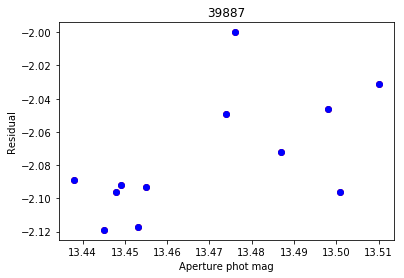

0.072 0.121
0.0237539470404 0.0281291663581


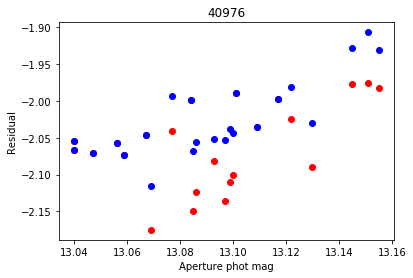

0.115 0.126
0.033018869555 0.0319544216997


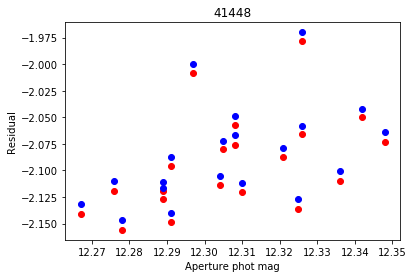

0.081 0.156
0.0219938059462 0.039069521369


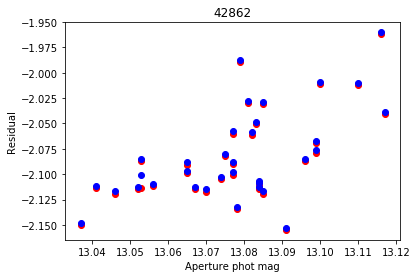

0.08 0.178
0.0196545424282 0.0363651345437


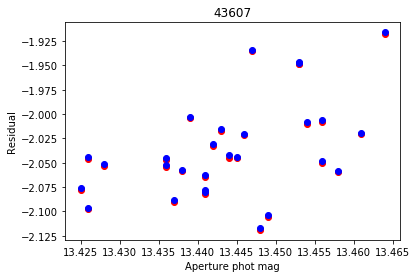

0.039 0.185
0.0103939616497 0.0455791529504


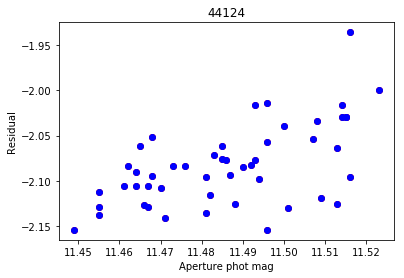

0.074 0.198
0.0200641827287 0.0366009925147


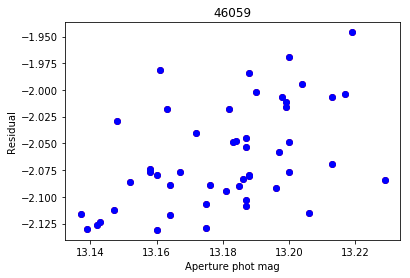

0.092 0.179
0.022377288123 0.0414372163495


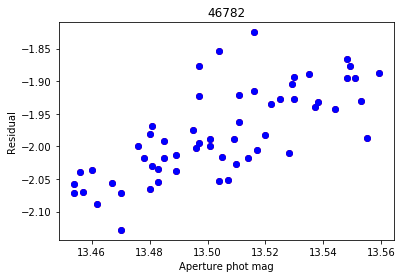

0.105 0.257
0.0288163080149 0.0508384983374


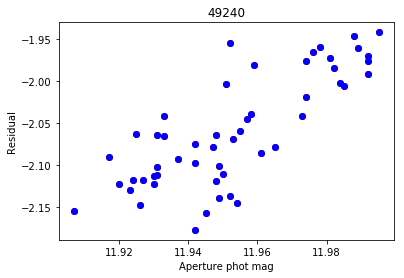

0.088 0.212
0.0230971305756 0.0496530864507


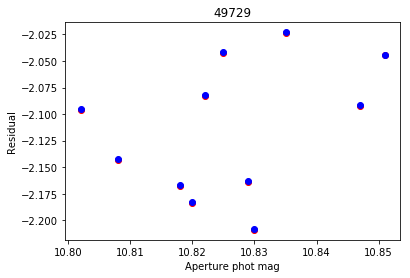

0.049 0.18
0.0141064430505 0.0568999411756


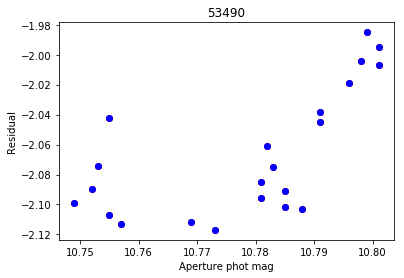

0.052 0.107
0.0172696767641 0.0329847510473


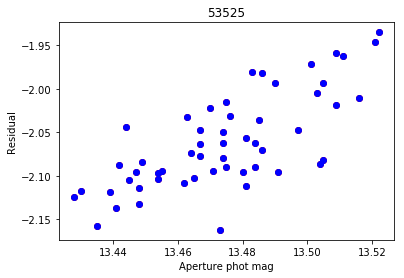

0.094 0.178
0.0241624020645 0.0400637223914


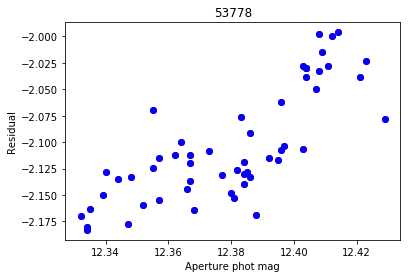

0.097 0.151
0.025894670313 0.0360934239685


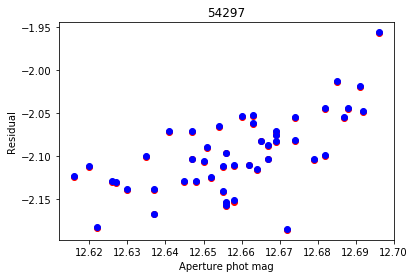

0.08 0.205
0.0197981020239 0.0353034218911


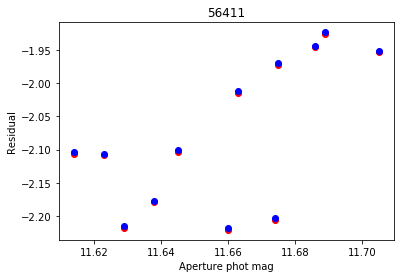

0.091 0.266
0.0275331870456 0.09293576037


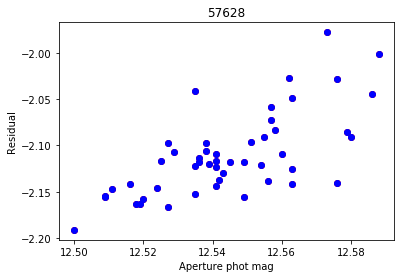

0.088 0.165
0.0211764369693 0.033717176335


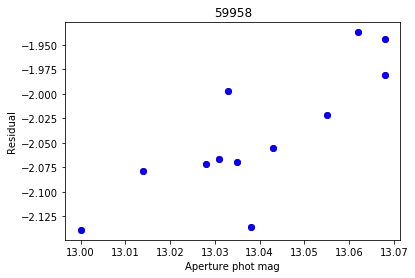

0.068 0.175
0.0201306496556 0.0489878102752


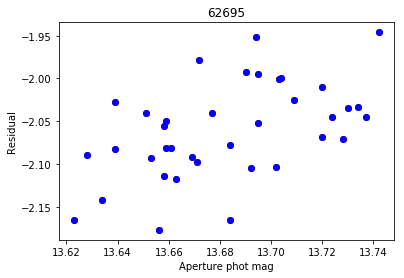

0.119 0.204
0.0326317299997 0.0478973366437


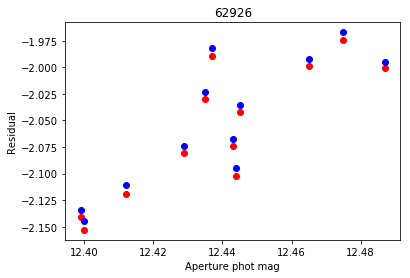

0.088 0.126
0.0263347837153 0.0393116995591


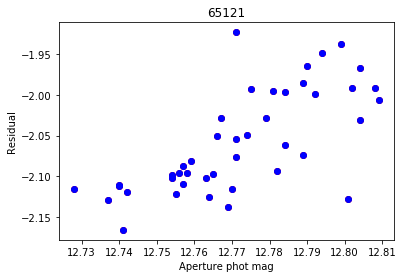

0.081 0.235
0.0209367690052 0.0495794318735


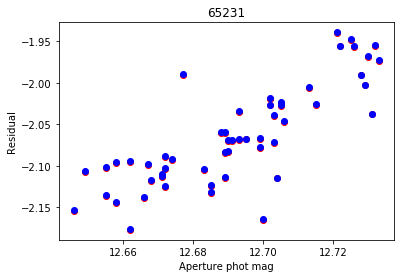

0.087 0.204
0.0238461863527 0.0430362880027


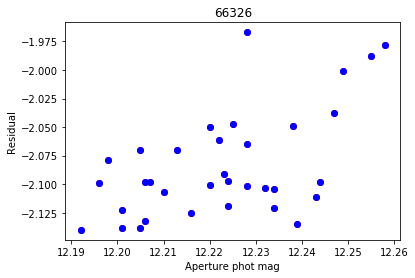

0.066 0.179
0.0174266877624 0.0389226453153


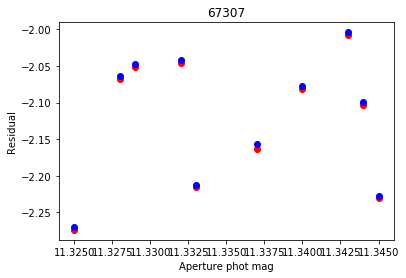

0.02 0.248
0.00684397545291 0.0853067406481


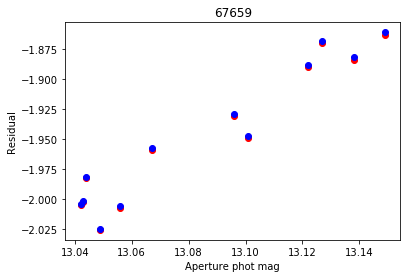

0.107 0.079
0.0388948011379 0.0222340766992


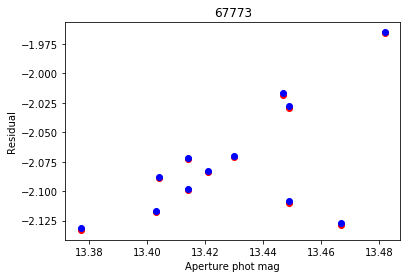

0.105 0.147
0.0287086659391 0.0379615119416


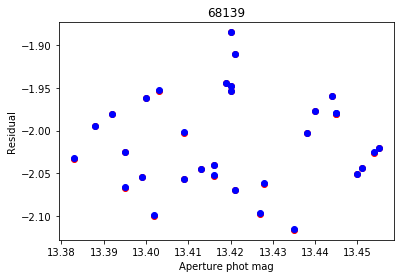

0.072 0.245
0.0204111785779 0.0581704123675


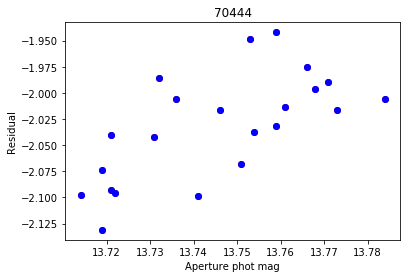

0.07 0.149
0.0204844730556 0.0397592184851


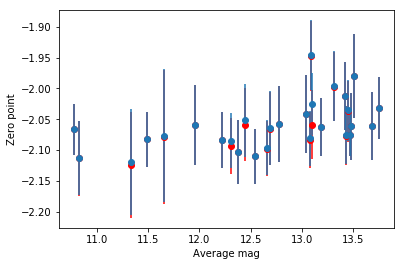

-2.06147691729 0.0393338537186
-2.059077767 0.039537832291


In [6]:
I1zp, I1zper = calibration.find_zp_bcds('I1', data_dir=folder)

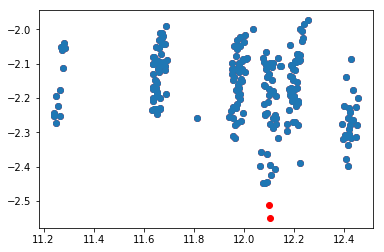

-2.18779372197 0.114966138731
-2.17130973451 0.0995791213541
There are 6 psf stars.


calibration.py:338: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 61092 but corresponding boolean dimension is 228
  x = obs_num[names == star]


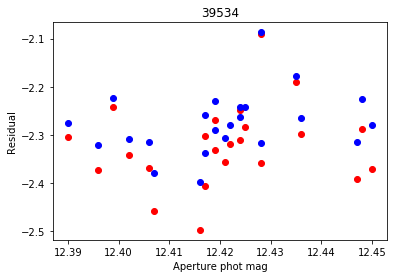

0.06 0.298
0.0157630133475 0.061226098689


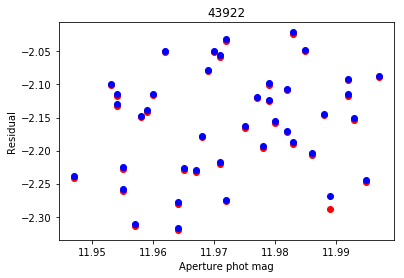

0.05 0.278
0.0132849160572 0.076710252377


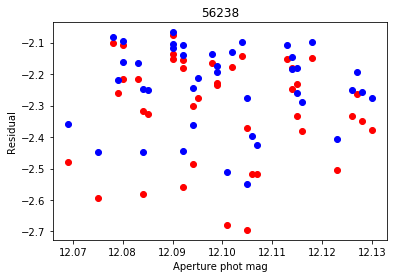

0.061 0.498
0.0158460769864 0.129794488177


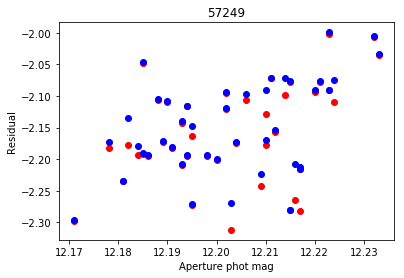

0.062 0.273
0.0152334279887 0.067073750809


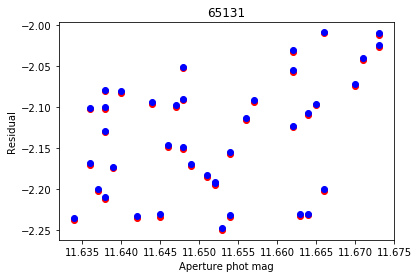

0.039 0.226
0.011594152621 0.066392765984


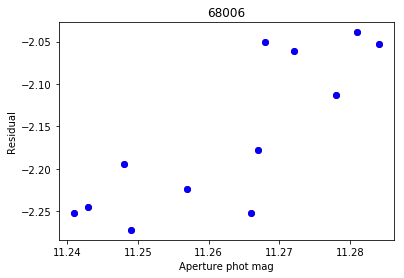

0.043 0.202
0.0143226704524 0.0763195038419


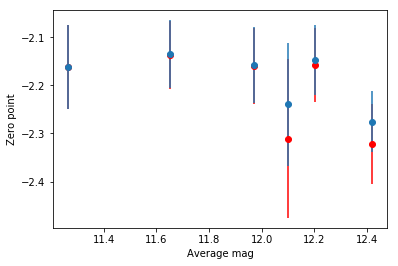

-2.20811339939 0.0769876461083
-2.18592332596 0.0521401533477


In [7]:
I2zp, I2zper = calibration.find_zp_bcds('I2', data_dir=folder)

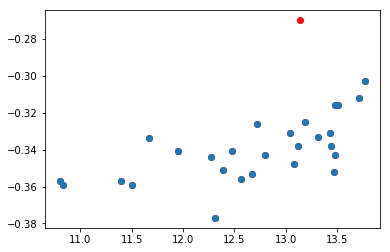

-0.340607142857 0.0241310992079
-0.340148148148 0.0165992050316
There are 28 psf stars.


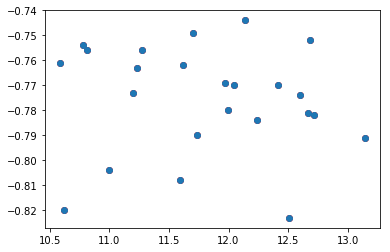

-0.780666666667 0.0267106779671
-0.775666666667 0.0212615981421
There are 24 psf stars.


In [8]:
I1_mosaic_zp, I1_mosaic_zper = calibration.find_zp_deep_mosaic(target, 'I1', data_dir=folder)
I2_mosaic_zp, I2_mosaic_zper = calibration.find_zp_deep_mosaic(target, 'I2', data_dir=folder)

In [9]:
calibration.apply_calibration_bcds(target, 'I1', -2.072, data_dir=folder)
calibration.apply_calibration_bcds(target, 'I2', -2.182, data_dir=folder)


NameError: global name 'alf' is not defined

In [3]:
calibration.apply_calibration_deep_mosaic(target, 'I1', -0.34, data_dir=folder)
calibration.apply_calibration_deep_mosaic(target, 'I2', -0.78, data_dir=folder)

## MIR catalog

In [4]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
analysis_routines.merge_opt_deep_catalogs(target, optical_dir, folder, cluster_coord=[center_ra, center_dec])

Reading optical catalog for NGC6402...
Finished reading optical catalog.
Reading MIR catalog for NGC6402...


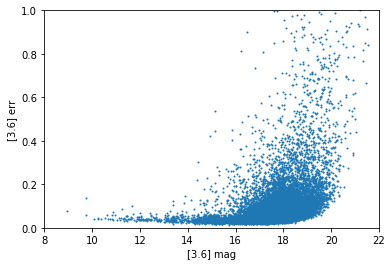

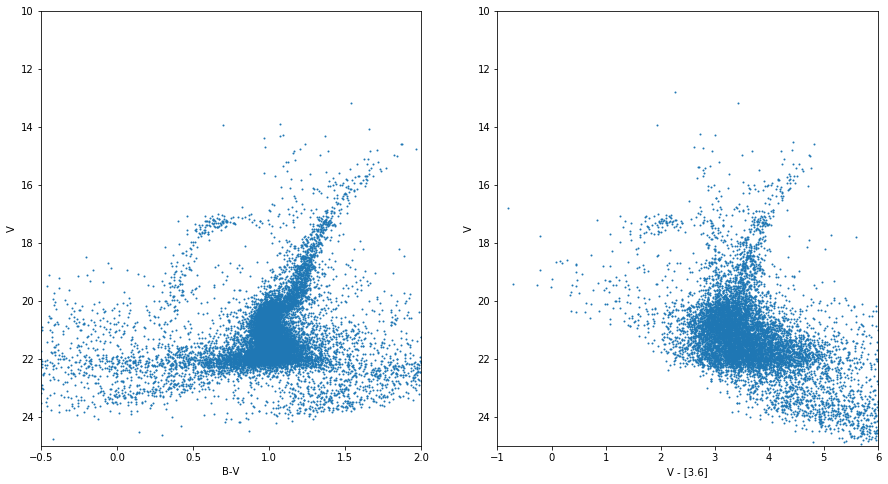

In [6]:
#center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
# change to read merged catalog
catalog_data = analysis_routines.read_merged_catalog(folder)

thres = 300
thres2 = 150
dist = catalog_data['rad_dist']
colorBV = catalog_data['B'][(dist > thres2) & (dist < thres)] - catalog_data['V'][(dist > thres2) & (dist < thres)]
Vmag = catalog_data['V'][(dist > thres2) & (dist < thres)]
colorVIR = catalog_data['V'][dist > thres2] - catalog_data['3.6'][dist > thres2]
mag = catalog_data['V'][dist > thres2]
magIR = catalog_data['3.6'][dist > thres2]
err = catalog_data['3.6er'][dist > thres2]

fig = mp.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(magIR, err, s=1, edgecolor=None)
ax1.set_ylim((0,1.0))
ax1.set_xlim((8,22))
ax1.set_xlabel('[3.6] mag')
ax1.set_ylabel('[3.6] err')

good_mag = mag[err < 0.2]
good_color = colorVIR[err < 0.2]

fig2 = mp.figure(figsize=(15,8))
ax2 = fig2.add_subplot(121)
ax2.scatter(colorBV, Vmag, s=1, edgecolor=None)
ax2.set_ylim((25,10))
ax2.set_xlim((-0.5,2))
ax2.set_xlabel('B-V')
ax2.set_ylabel('V')
ax3 = fig2.add_subplot(122)
ax3.scatter(good_color, good_mag, s=1, edgecolor=None)
ax3.set_ylim((25,10))
ax3.set_xlim((-1,6))
ax3.set_xlabel('V - [3.6]')
ax3.set_ylabel('V')
mp.savefig(folder+target+'cmd.eps', format='eps')

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

## First check on RRL PL relation

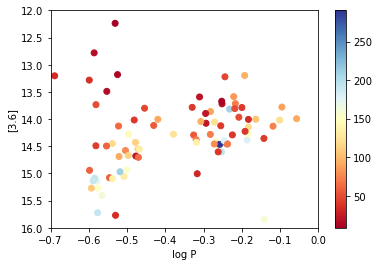

In [8]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))

dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
dao_ids = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

catalog_data = analysis_routines.read_merged_catalog(folder)

mag = np.zeros(len(data['id']))
dist = np.zeros(len(data['id']))

for ind, star in enumerate(data['id']):
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    if len(dao_id) == 0: continue
    m = catalog_data['3.6'][catalog_data['id'] == dao_id]  
    d = catalog_data['rad_dist'][catalog_data['id'] == dao_id]
    if m < 50: 
        mag[ind] = m
        dist[ind] = d
    if m > 50: 
        mag[ind] = np.nan
        dist[ind] = np.nan

cm = mp.cm.get_cmap('RdYlBu')    
mp.scatter(np.log10(data['new_period']), mag, c=dist, cmap=cm) 
mp.colorbar()
mp.ylim((16, 12))
mp.xlim((-0.7, 0))
mp.xlabel('log P')
mp.ylabel('[3.6]')
mp.savefig(target+'pl.eps', format='eps')

##  Generate MIR light curves matching optical ID numbers  

In [7]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], data_dir=folder)

#### Phase MIR light curves

V4 not found.
V11 not found.
V12 not found.
V19 not found.
V20 not found.
V24 not found.
V36 not found.
V56 not found.
V62 not found.
V71 not found.
V75 not found.
V86 not found.
V94 not found.
V95 not found.
V96 not found.
V100 not found.
V114 not found.
V117 not found.
V121 not found.
V122 not found.
V128 not found.
V139 not found.
V144 not found.
V147 not found.
V153 not found.
V157 not found.
V160 not found.
V163 not found.
V164 not found.


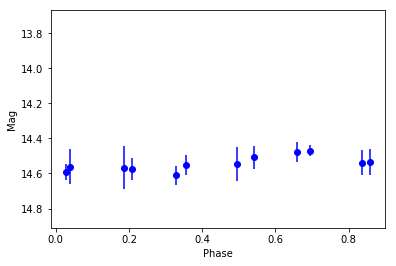

In [9]:
dtype1 = np.dtype([('id', 'S10'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))

for ind, lcv in enumerate(data['id']):
    lcv_file = folder+'lcvs/mir/'+lcv+'.lcv'
    try:
        lightcurves.phase_lcv(lcv_file, data['new_period'][ind], 0, bin=1)
    except:
        print lcv +' not found.'

#### Create figure with all bands phased together

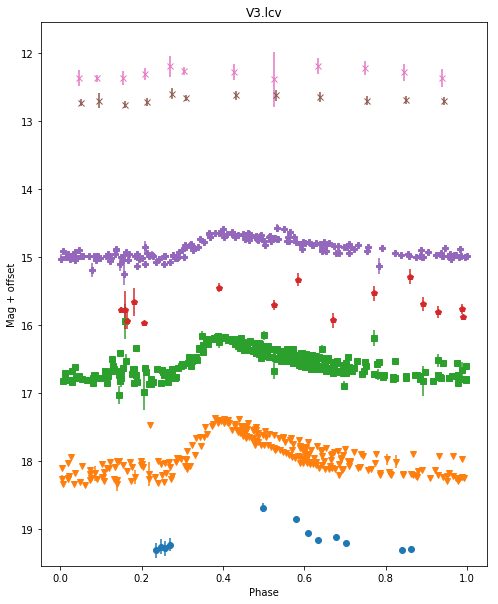

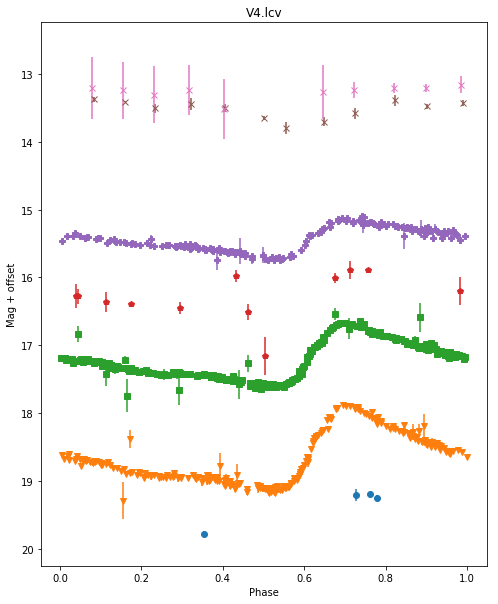

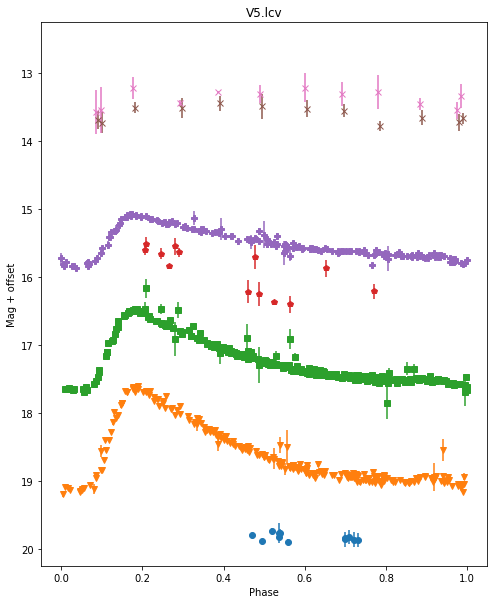

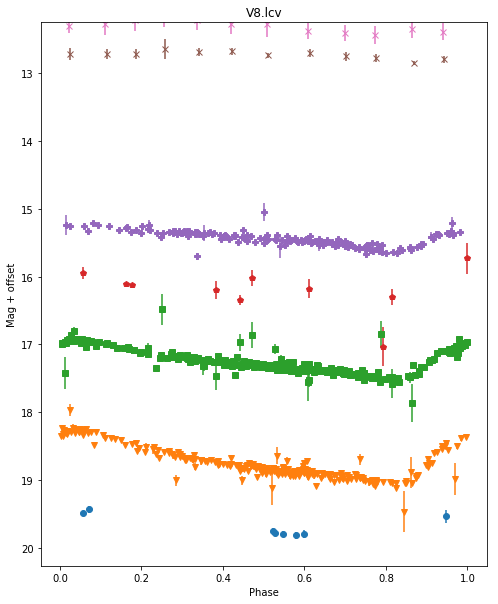

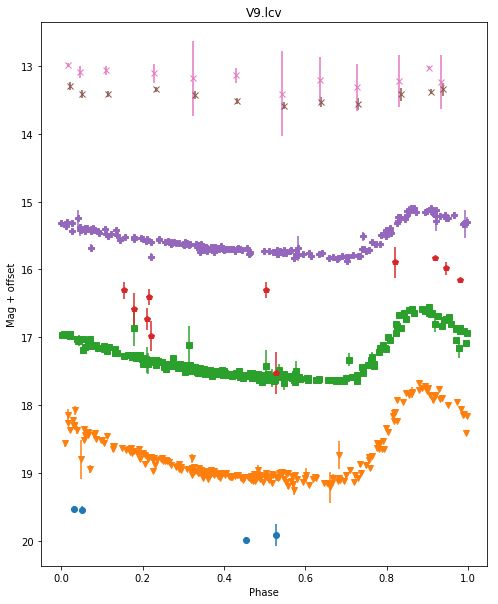

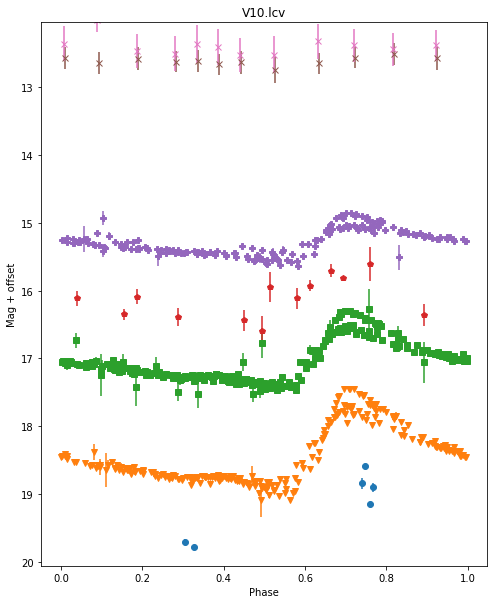

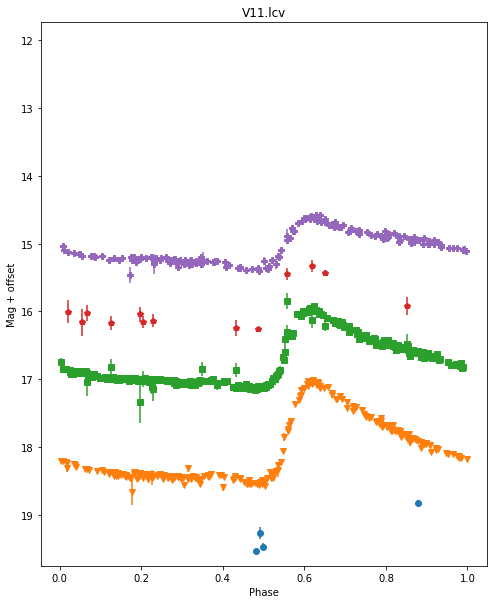

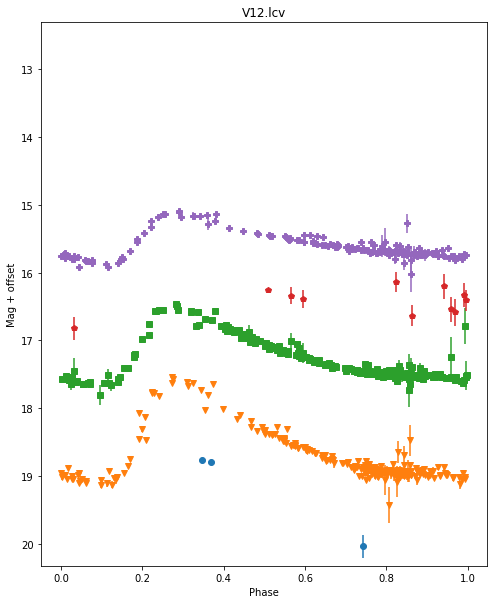

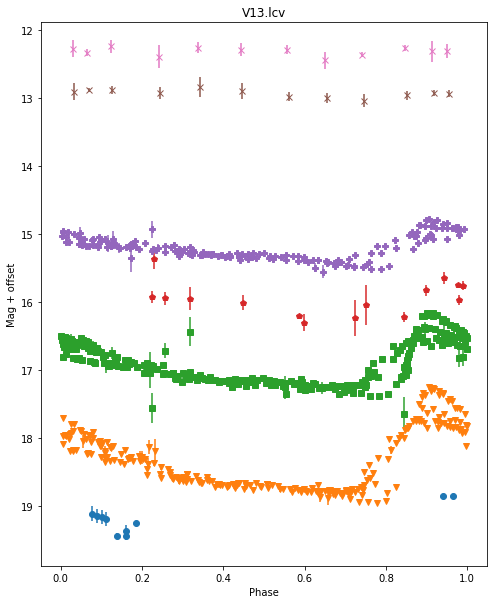

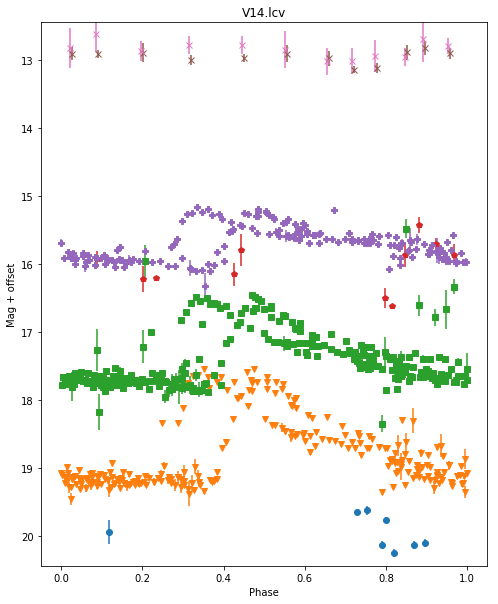

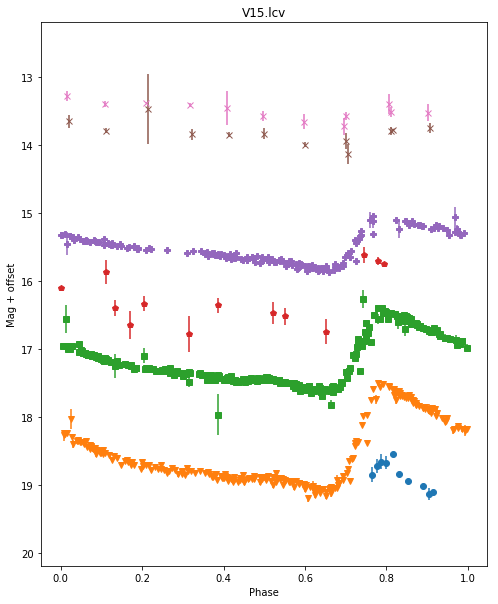

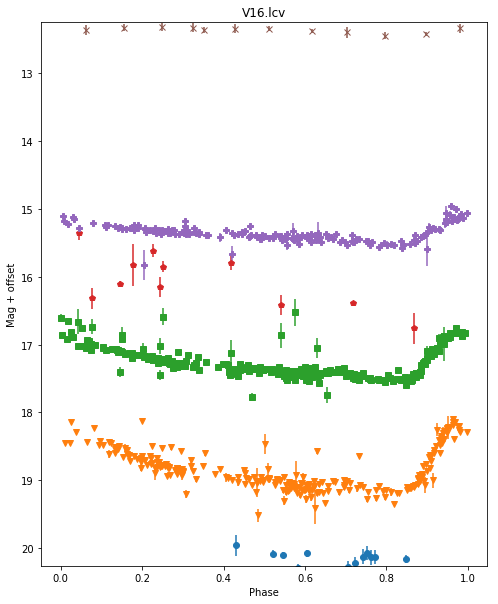

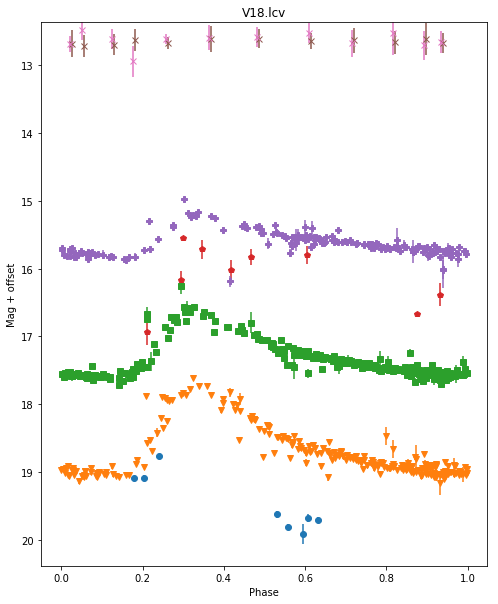

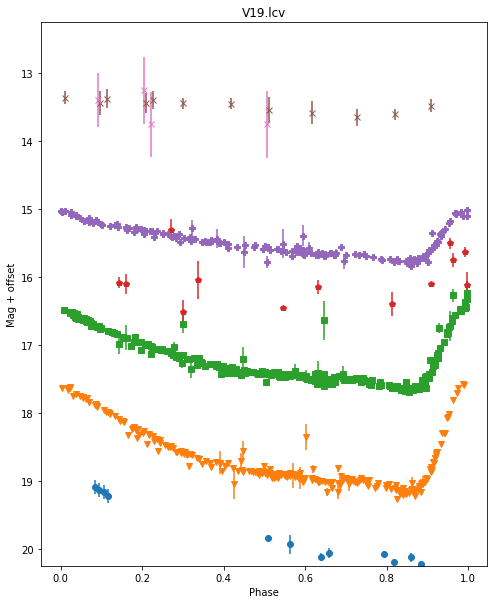

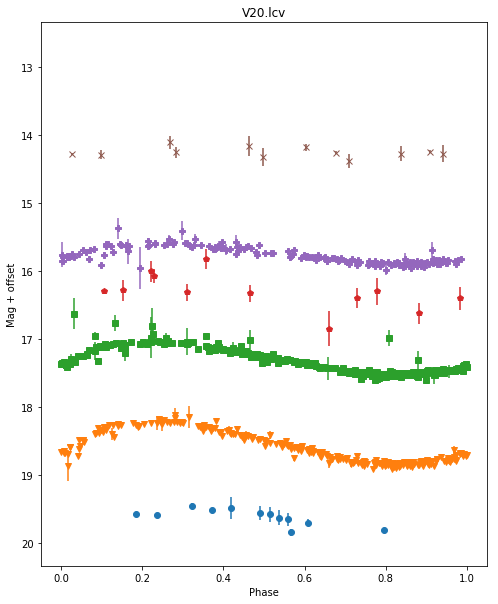

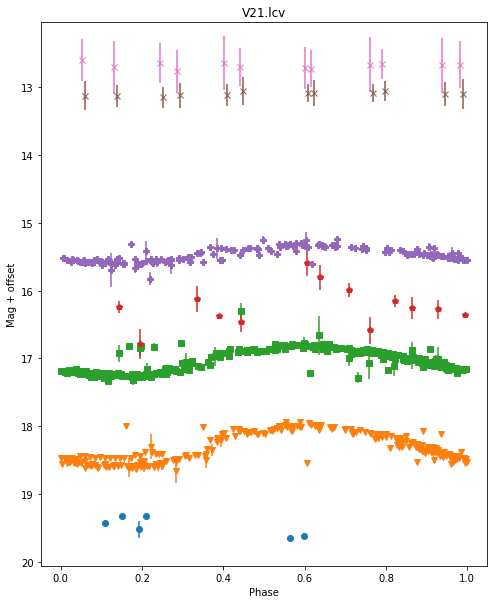

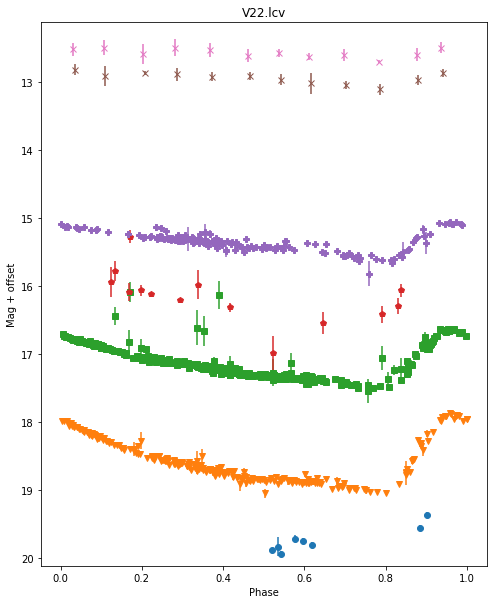

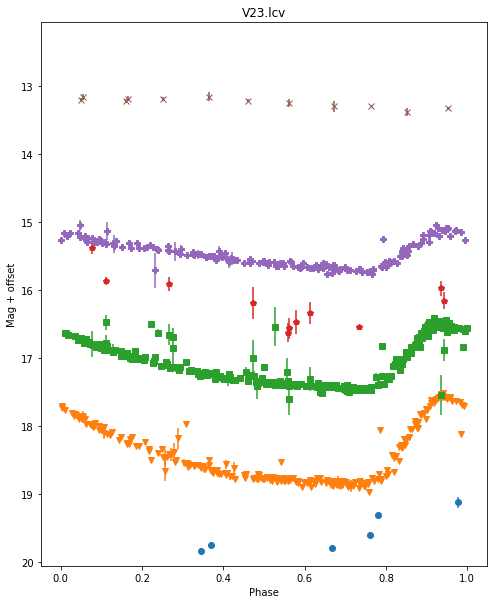

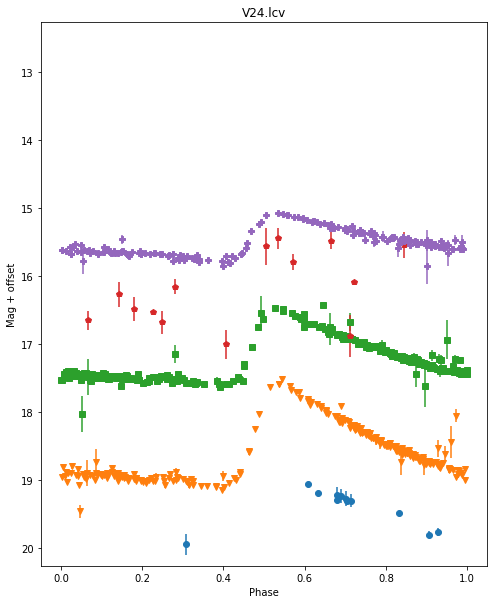

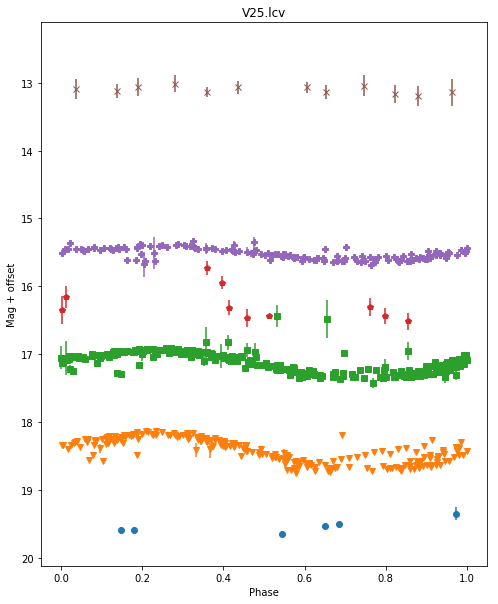

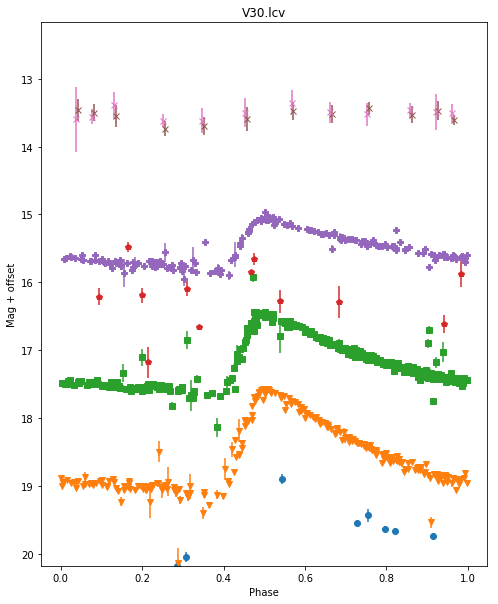

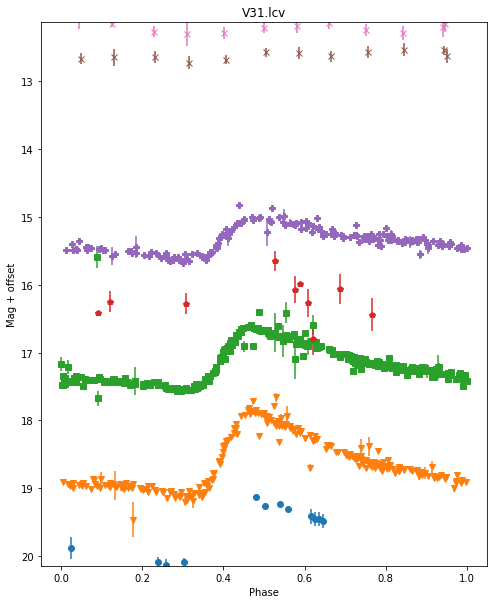

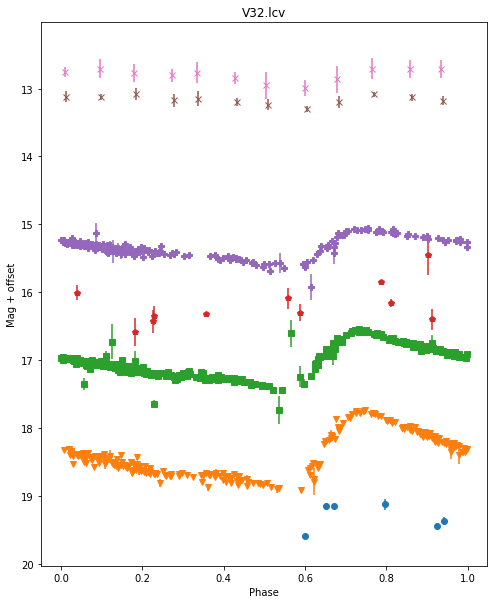

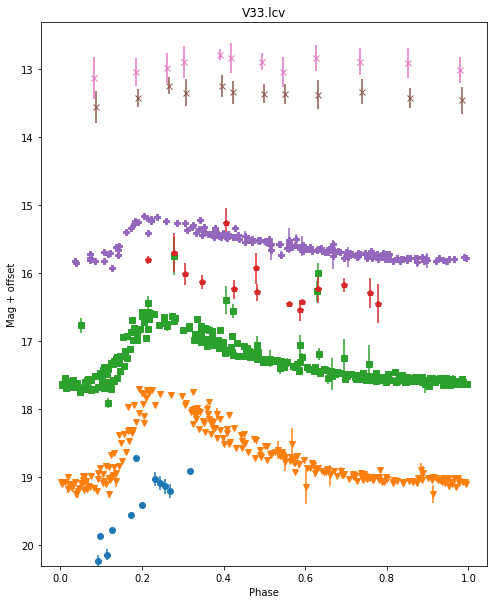

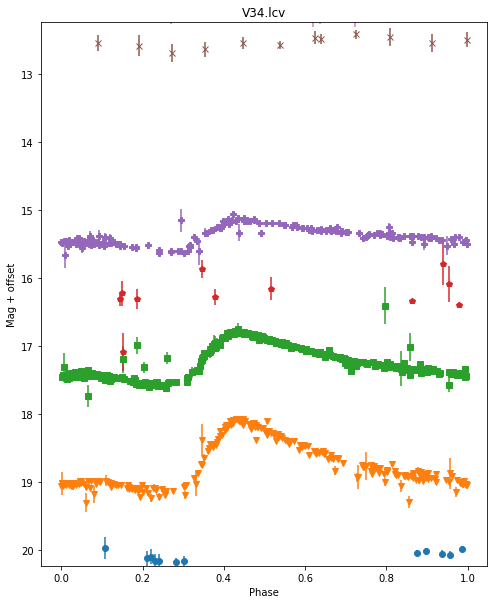

V36  not found.


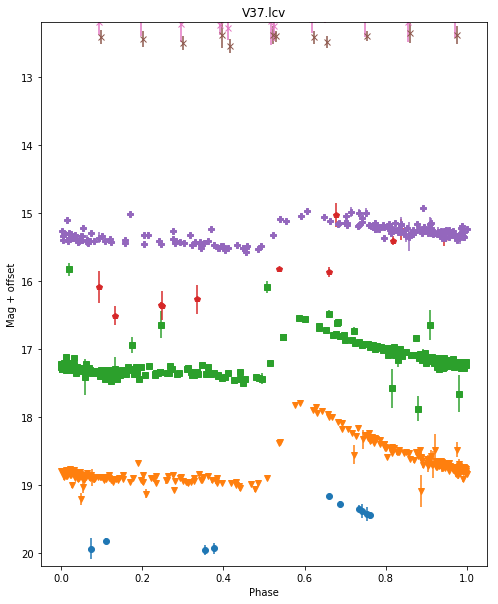

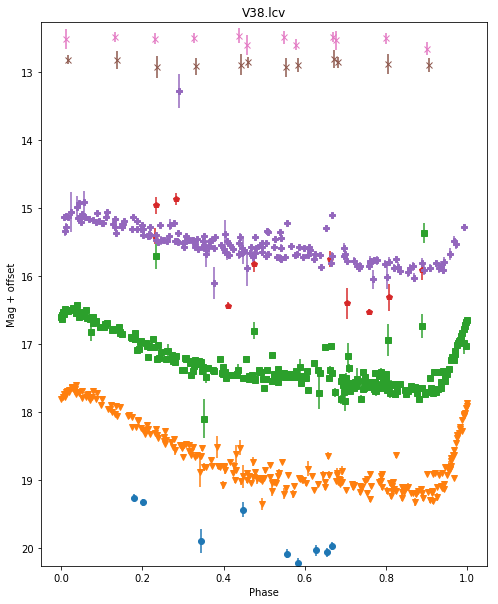

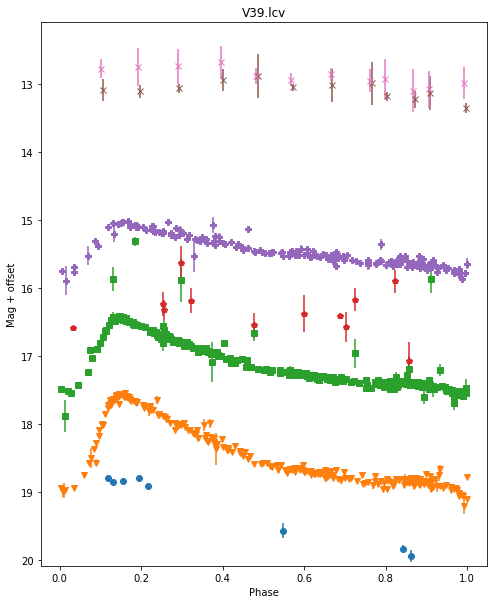

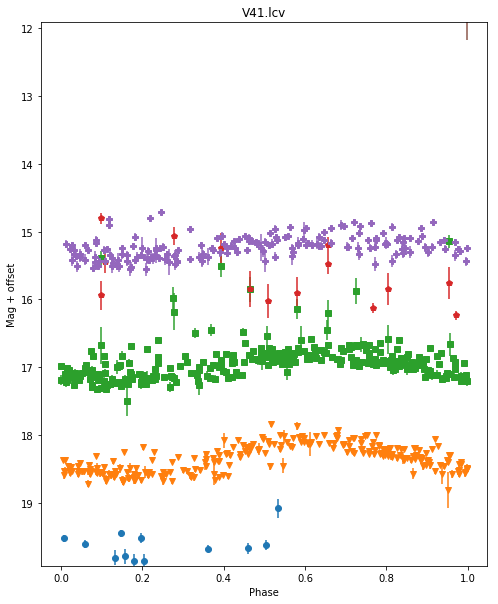

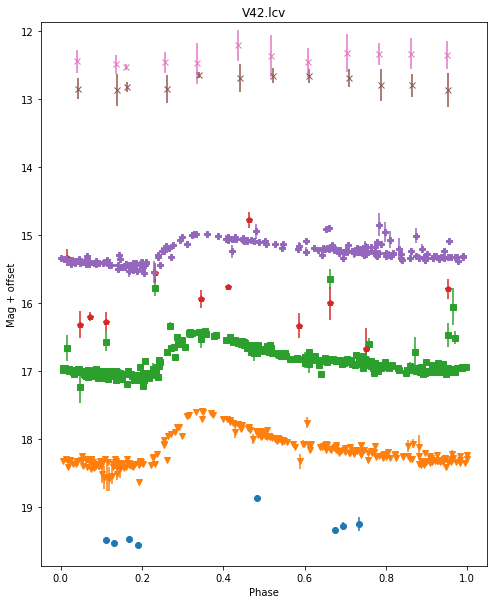

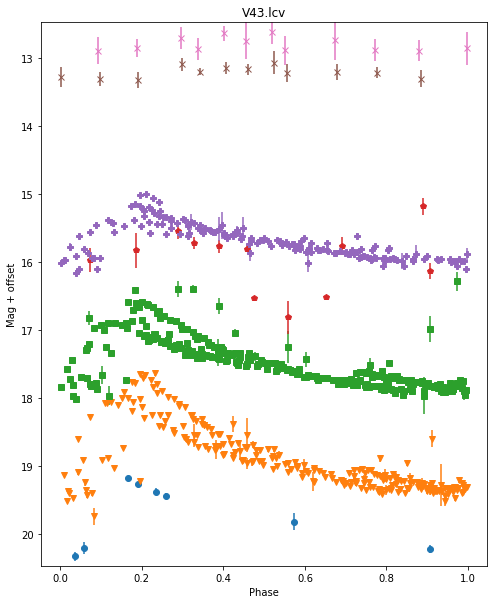

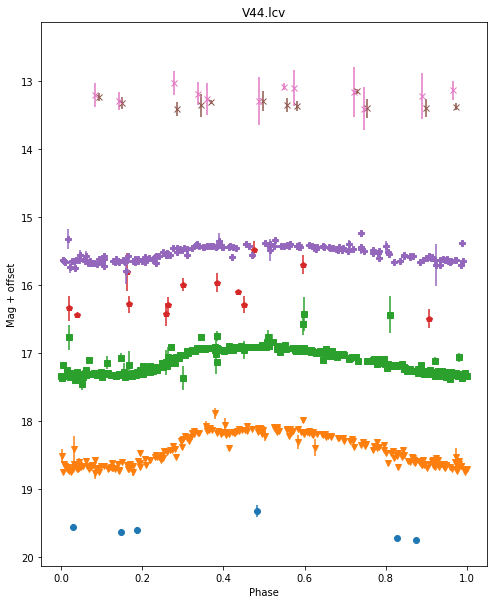

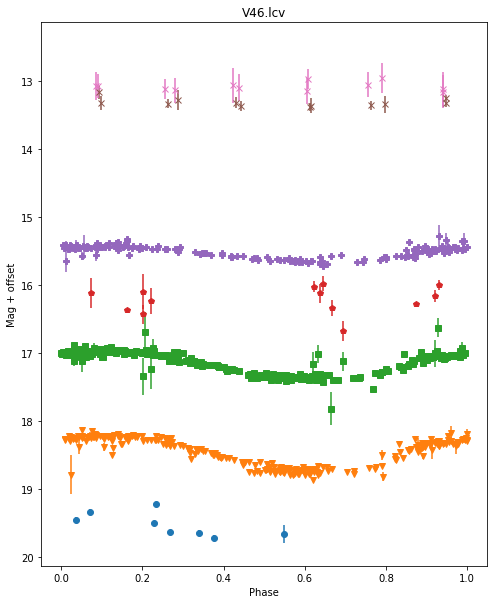

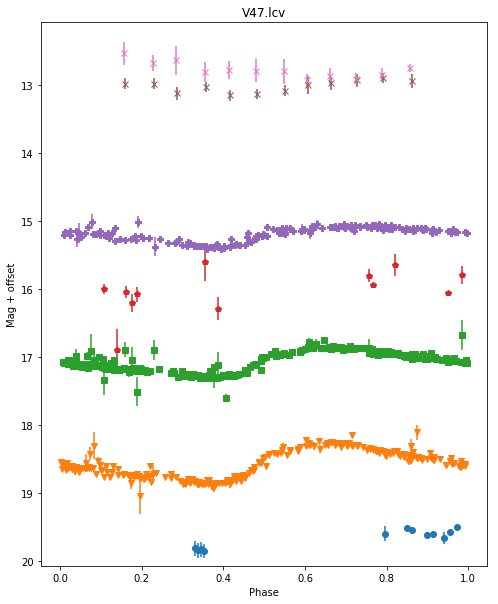

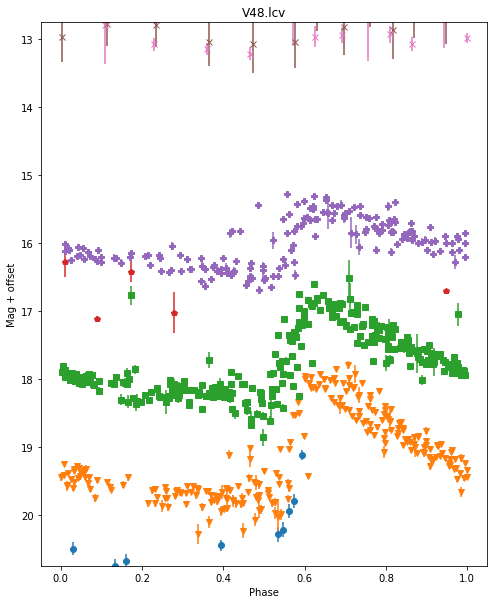

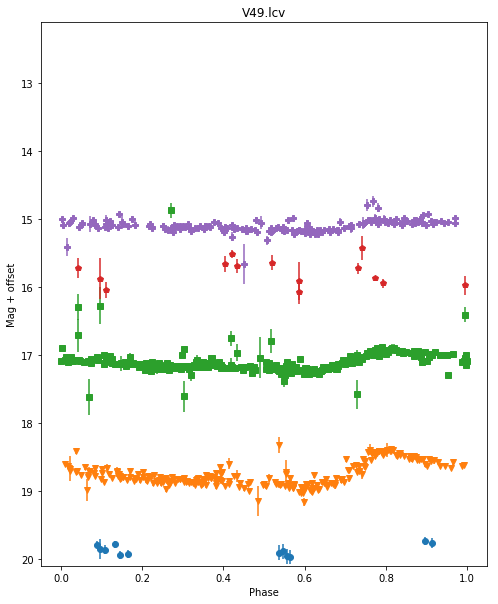

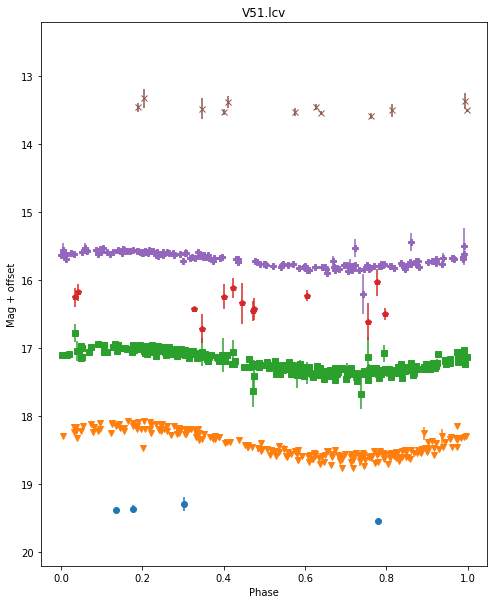

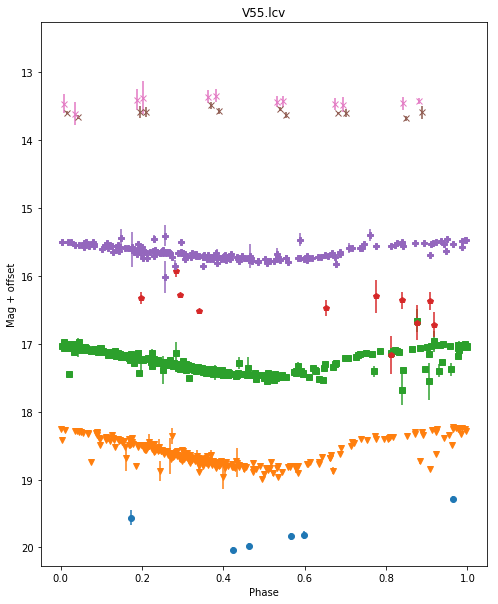

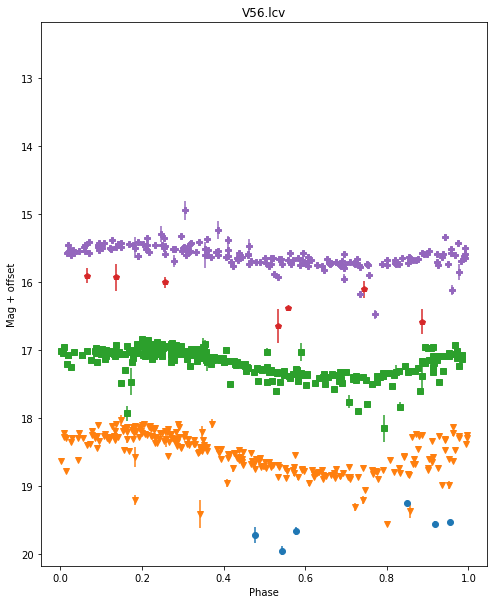

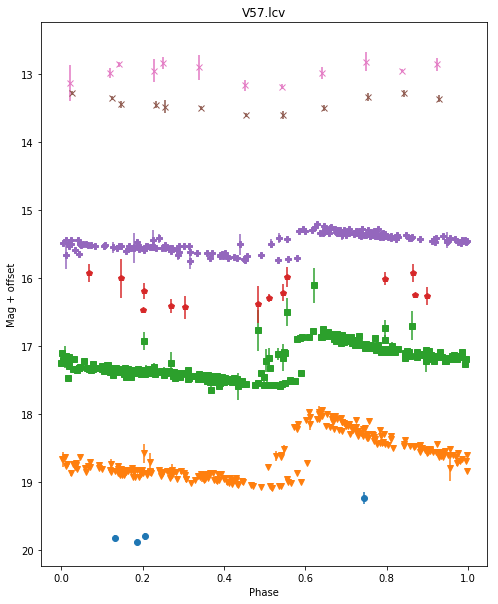

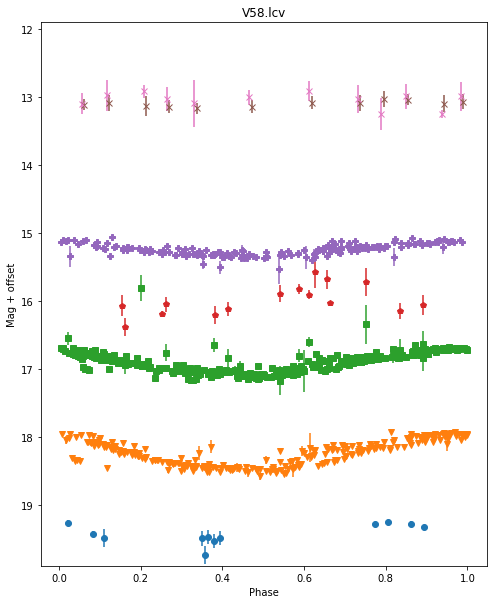

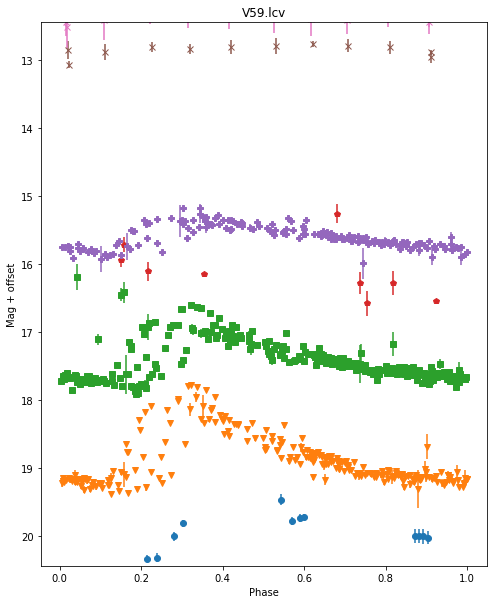

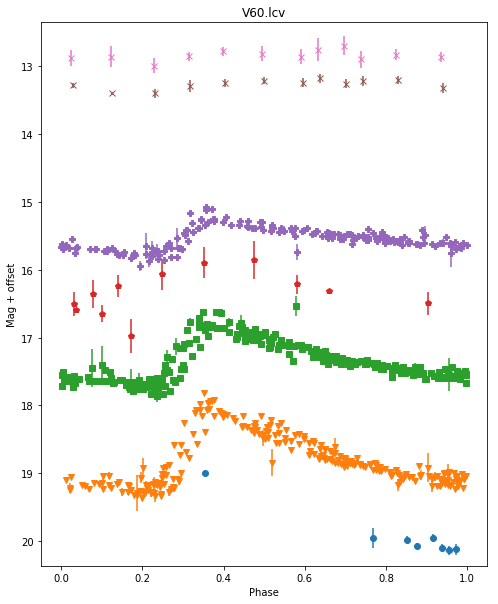

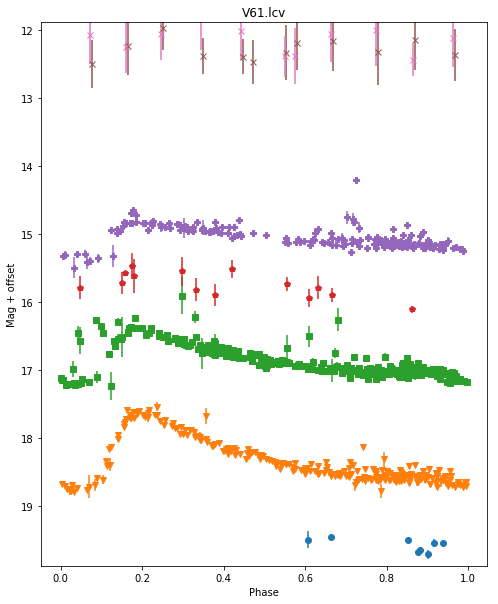

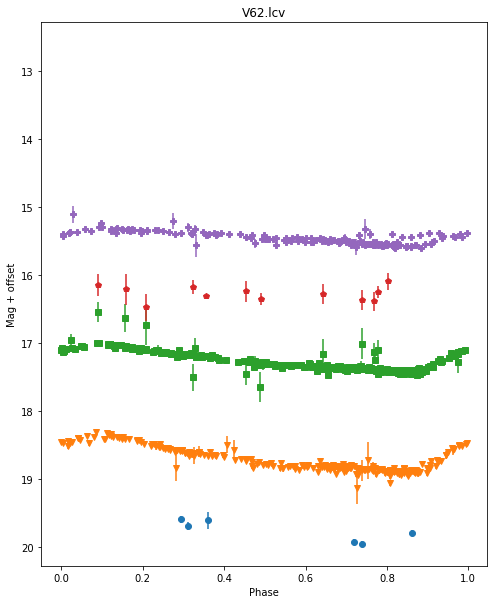

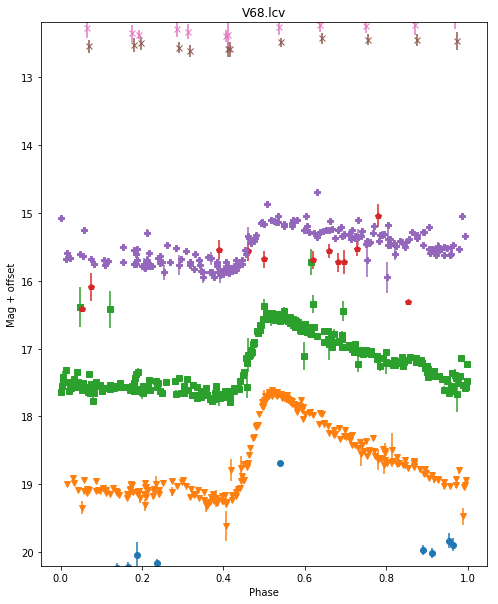

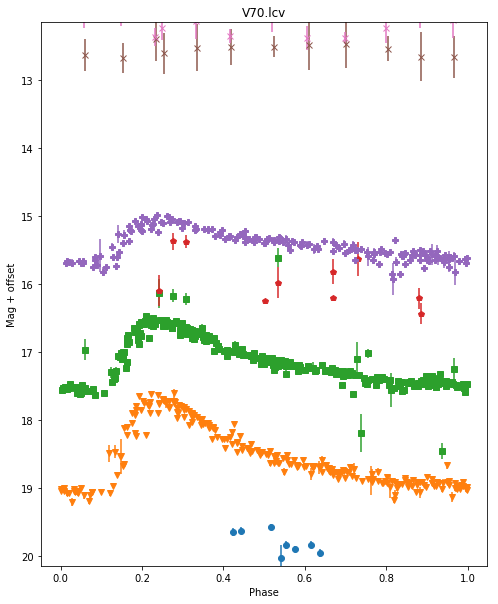

V71  not found.


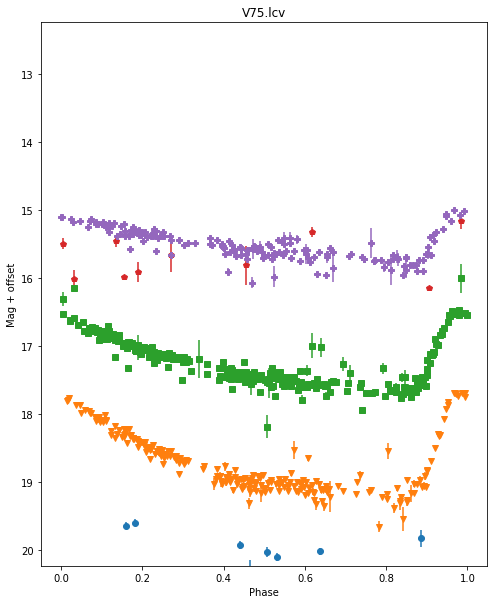

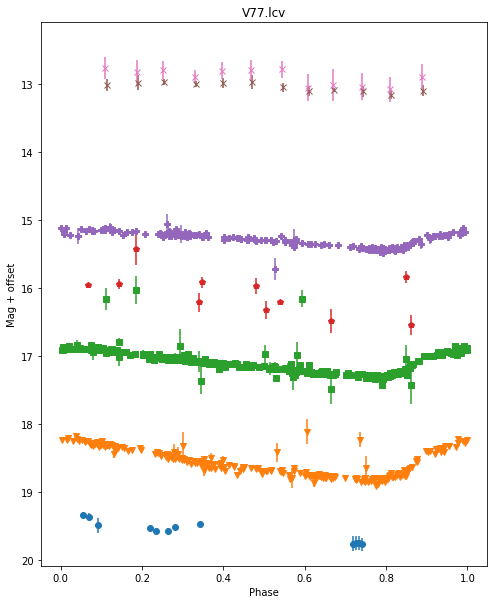

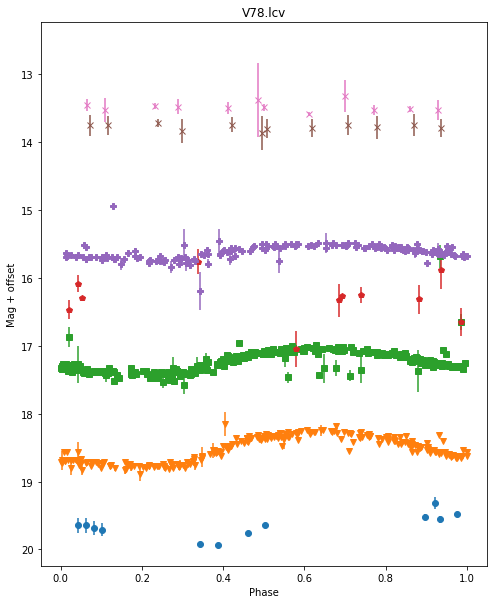

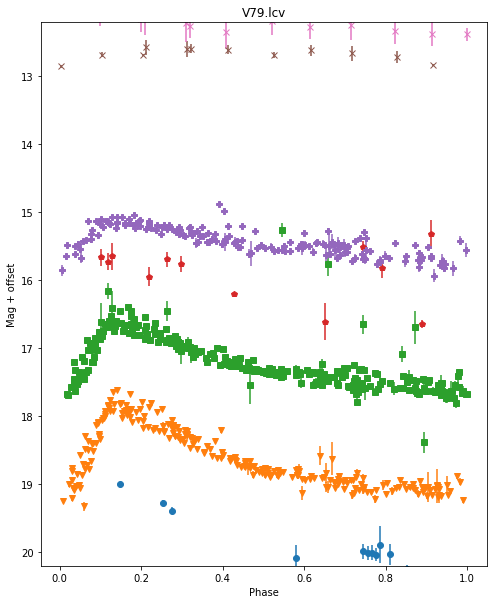

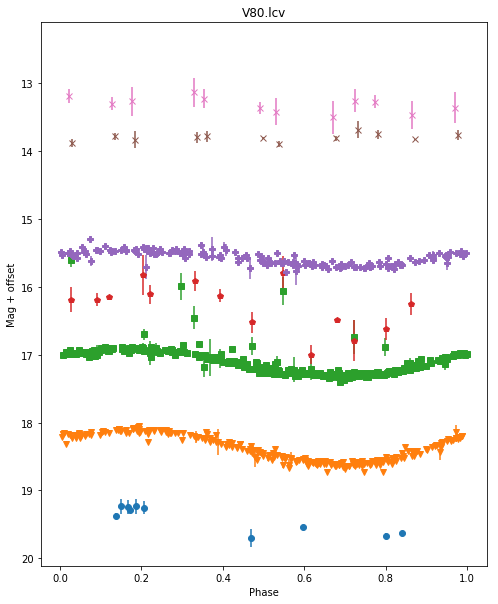

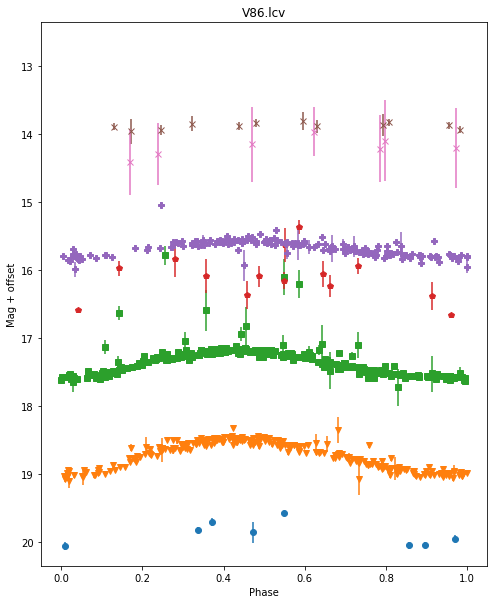

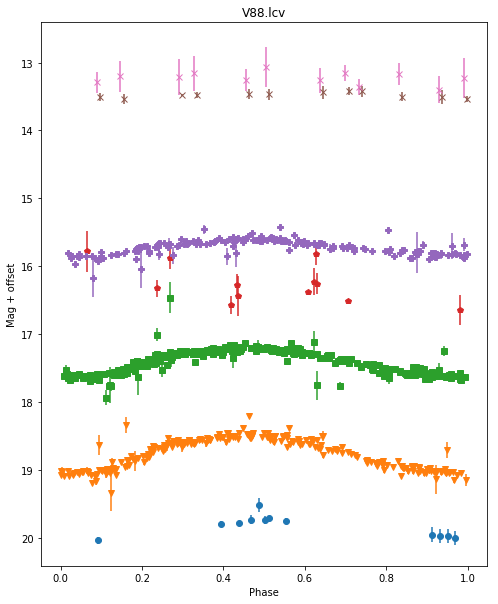

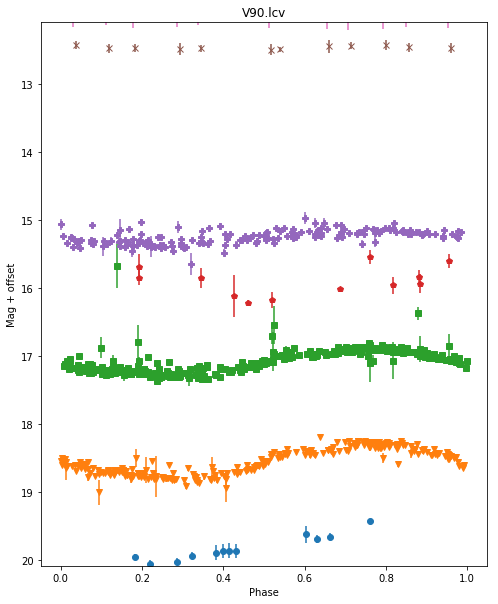

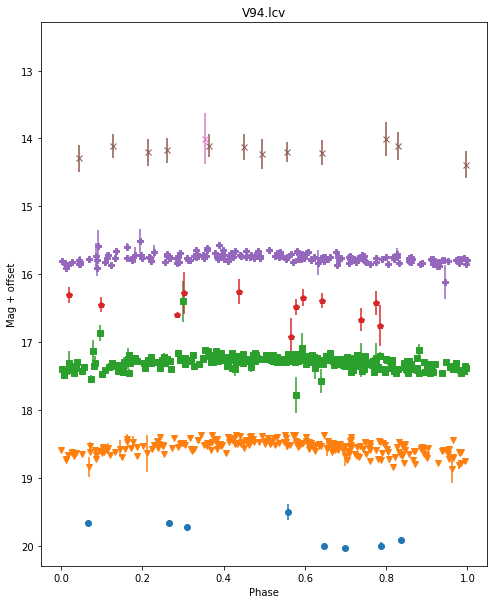

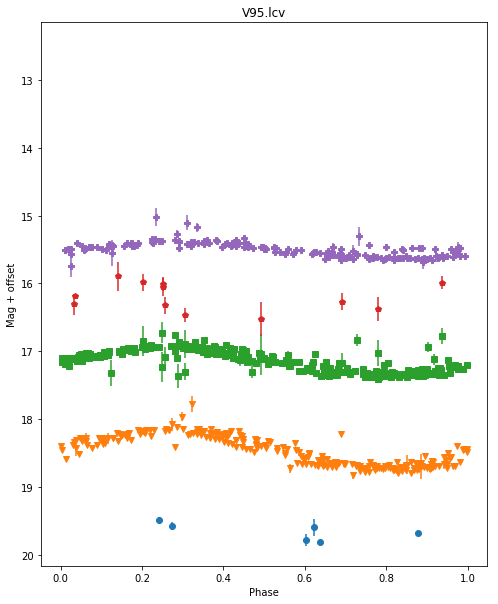

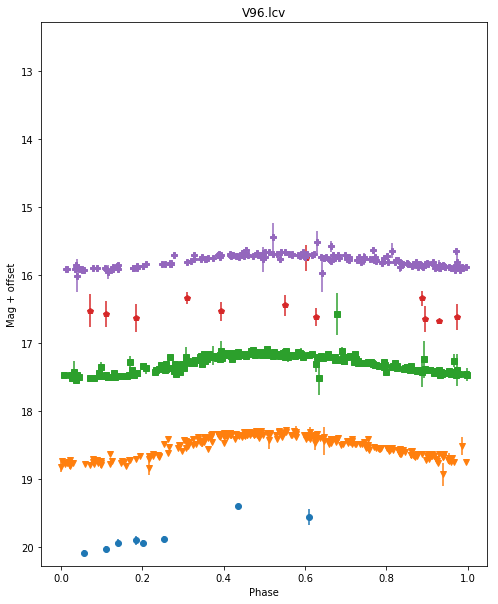

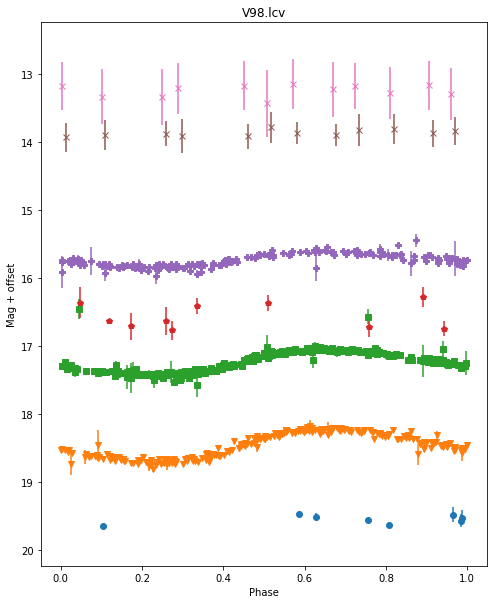

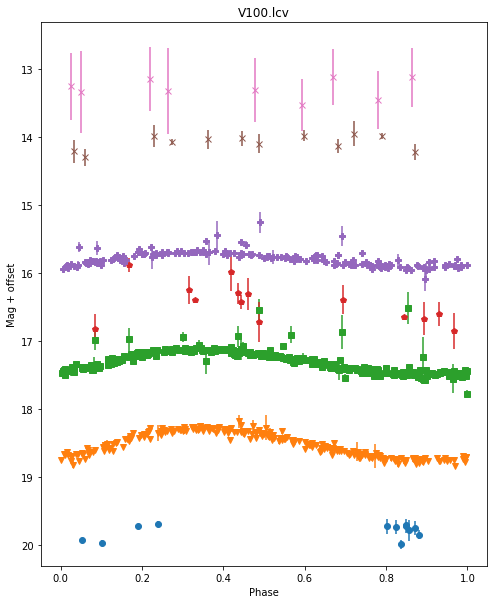

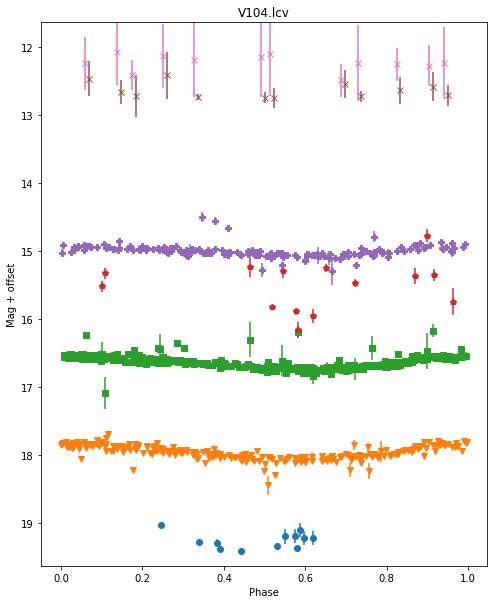

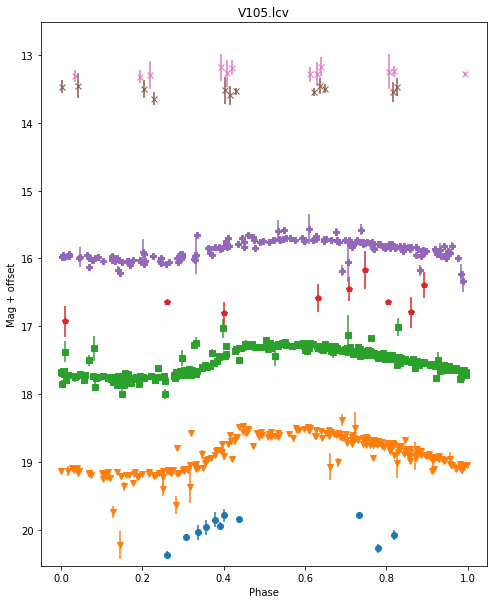

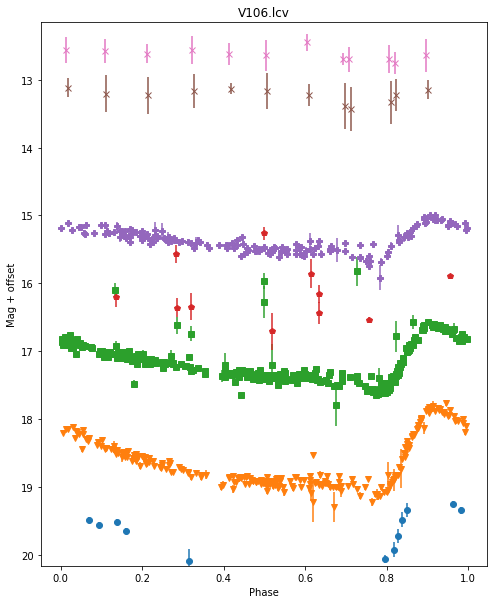

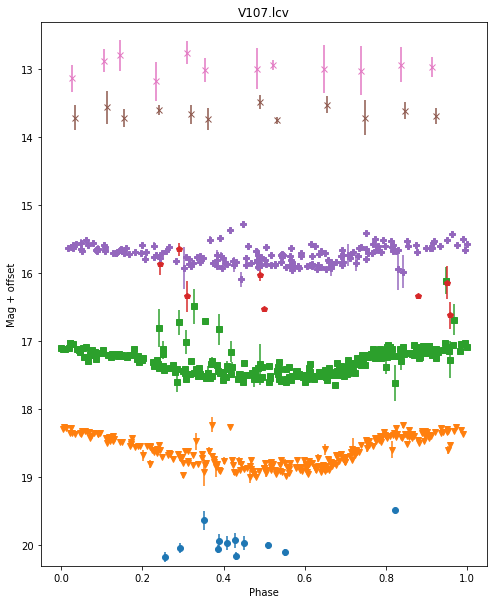

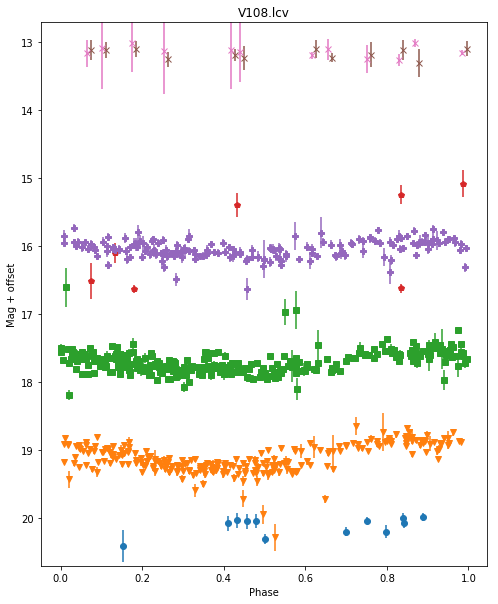

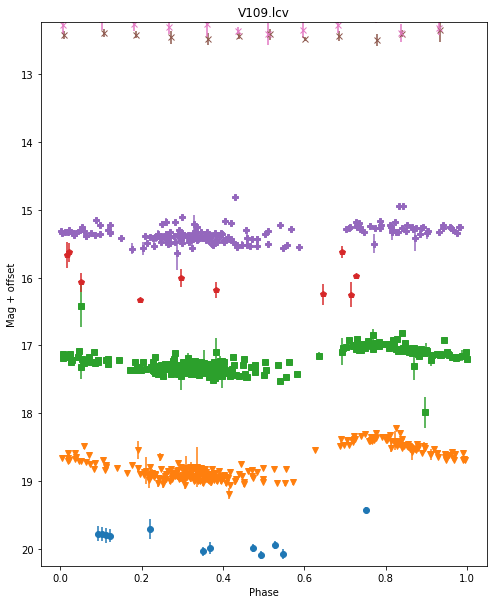

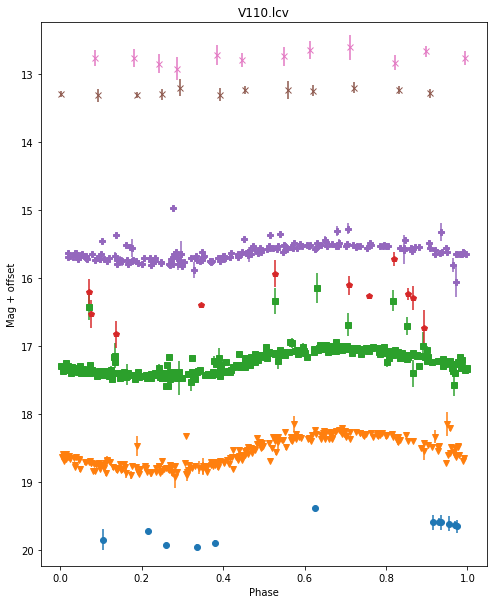

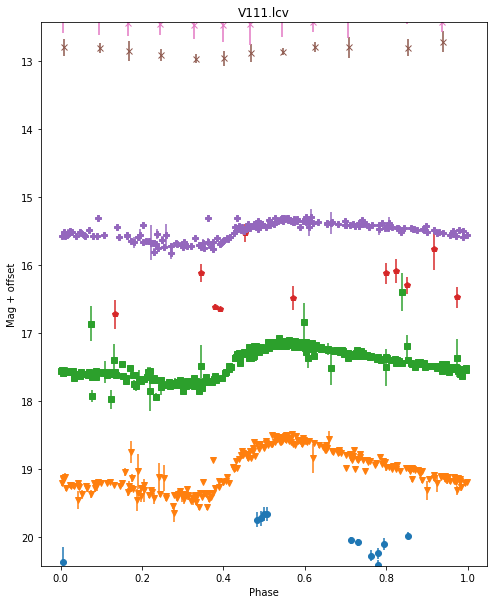

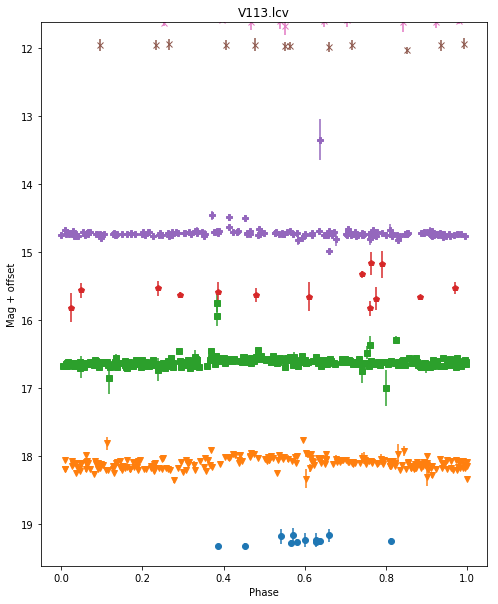

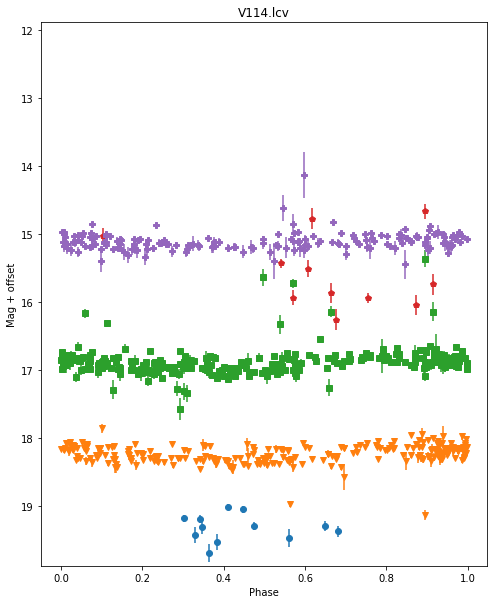

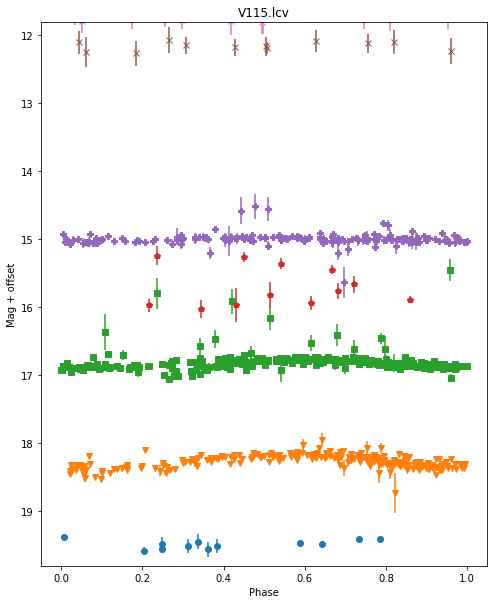

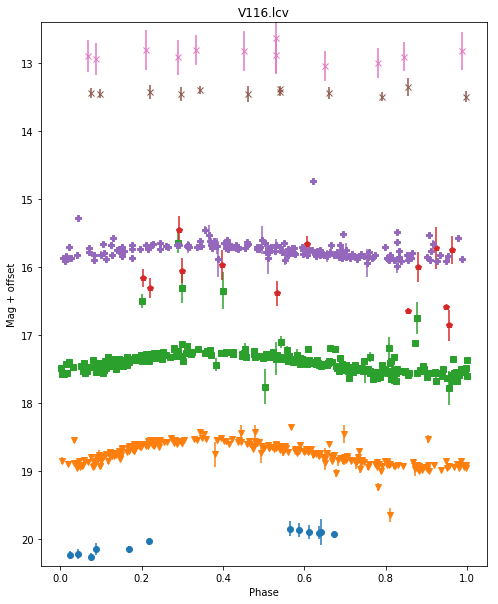

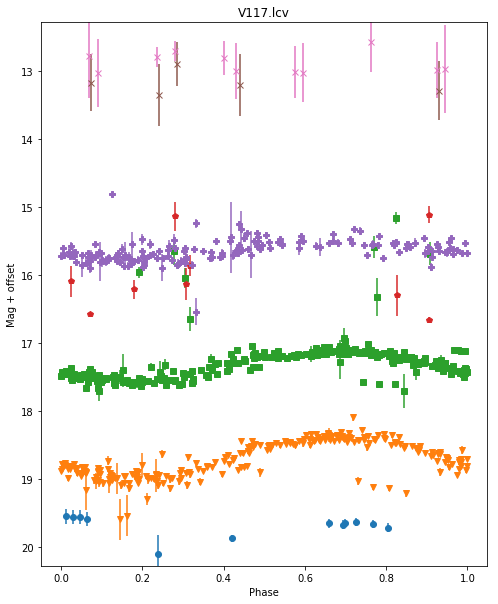

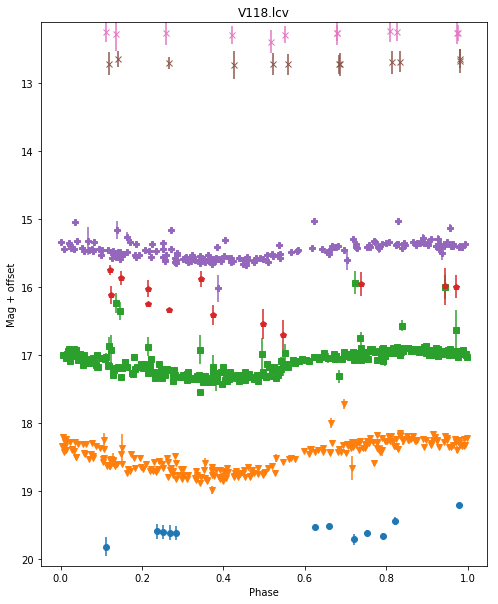

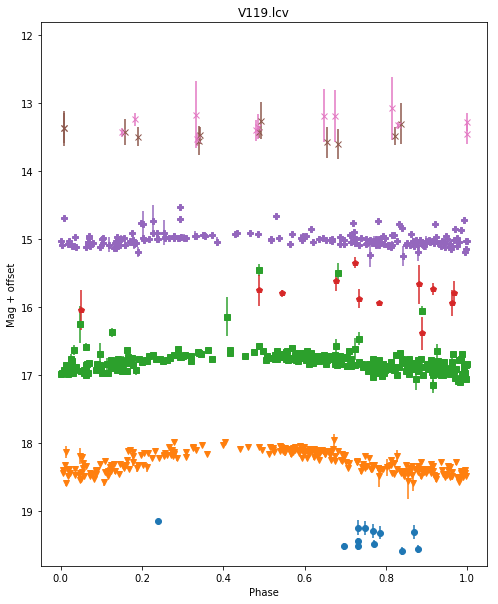

V120  not found.
V121  not found.


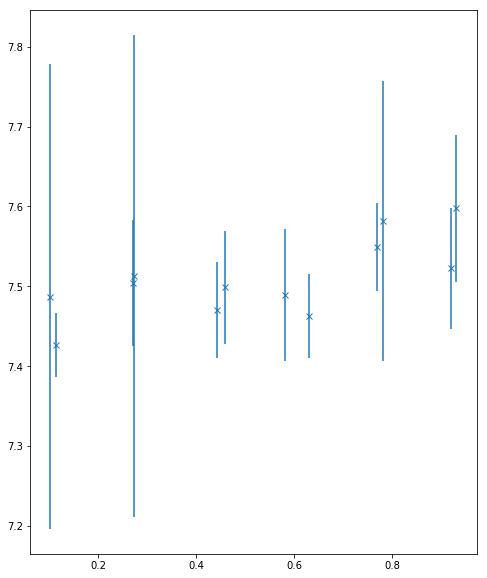

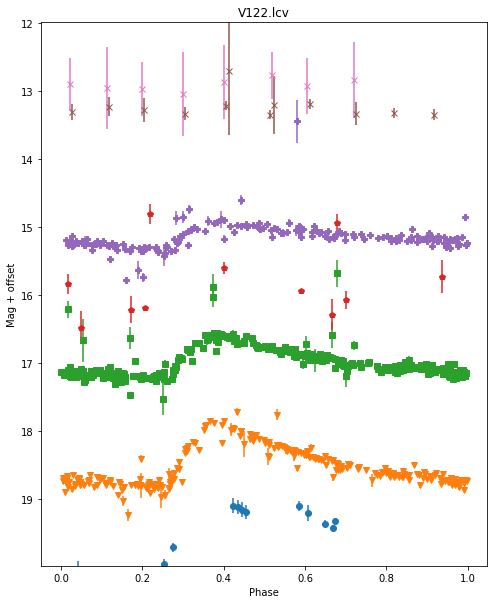

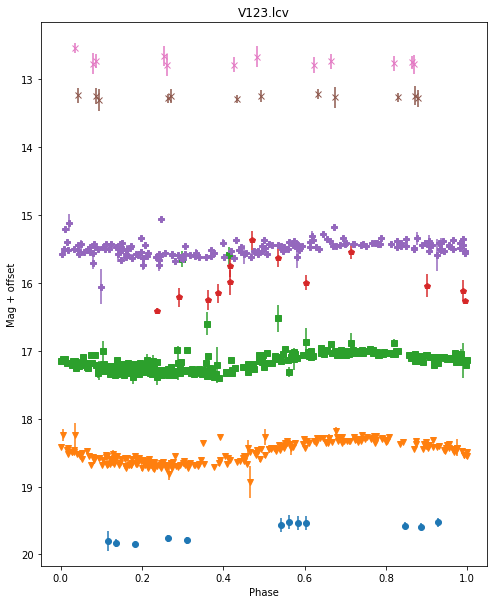

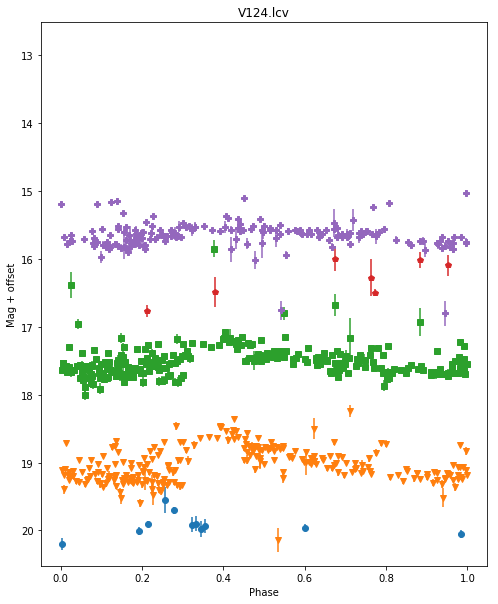

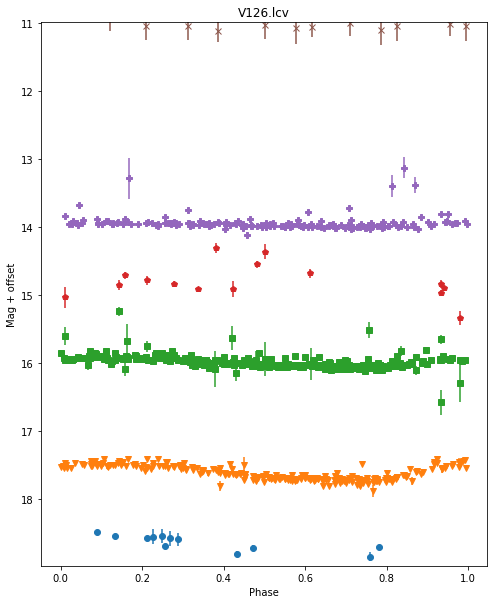

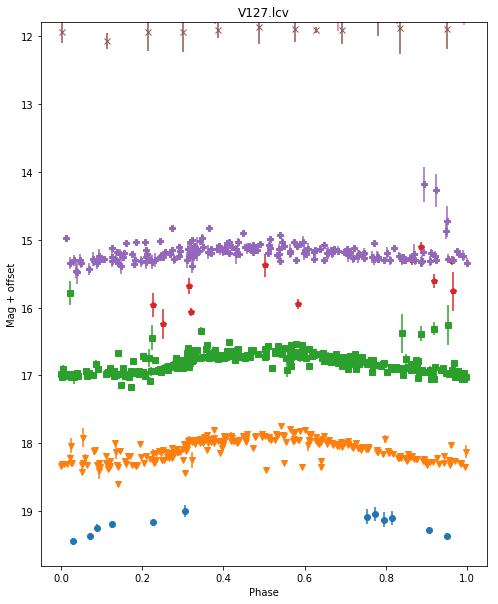

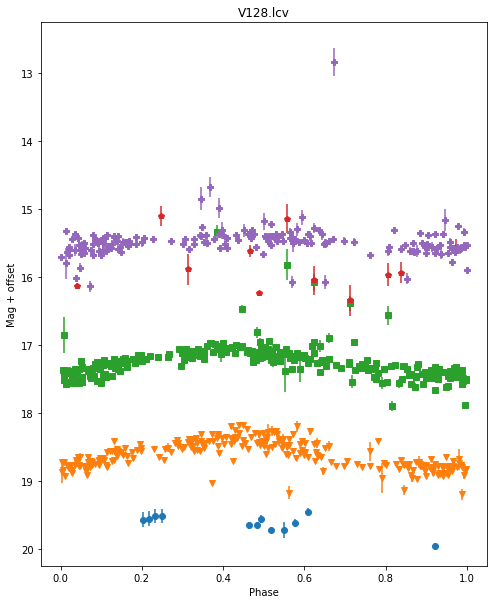

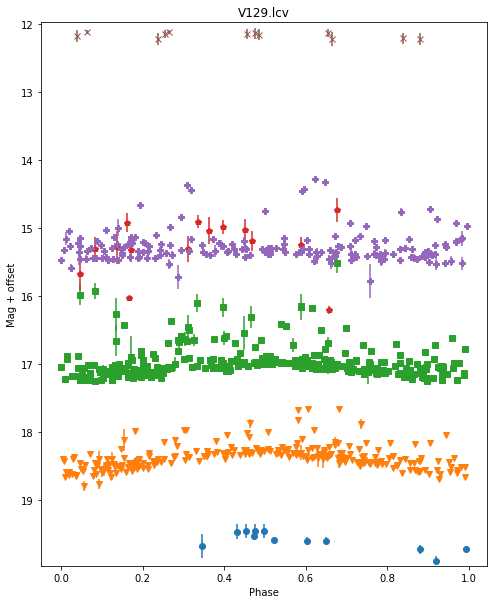

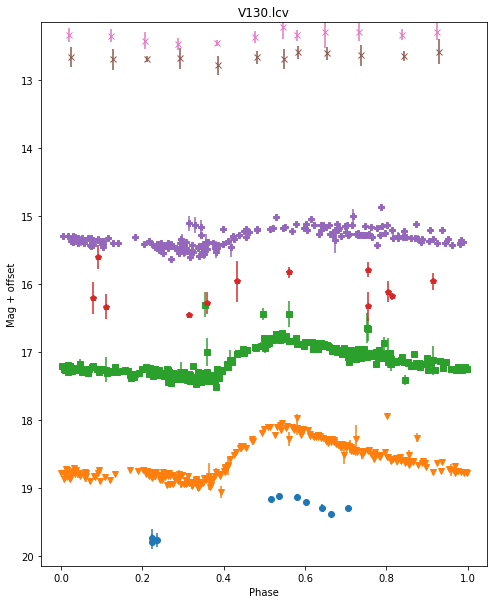

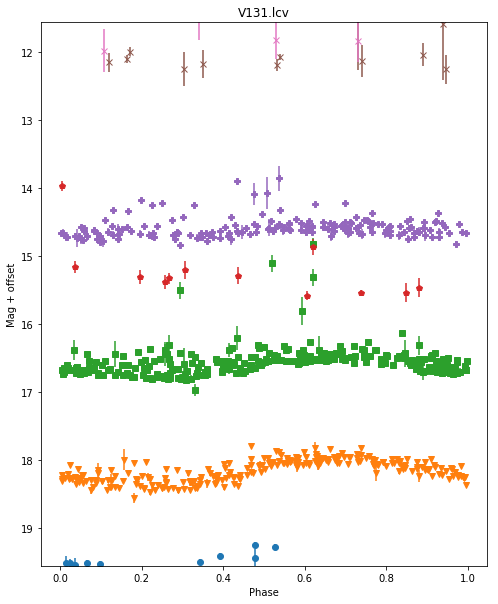

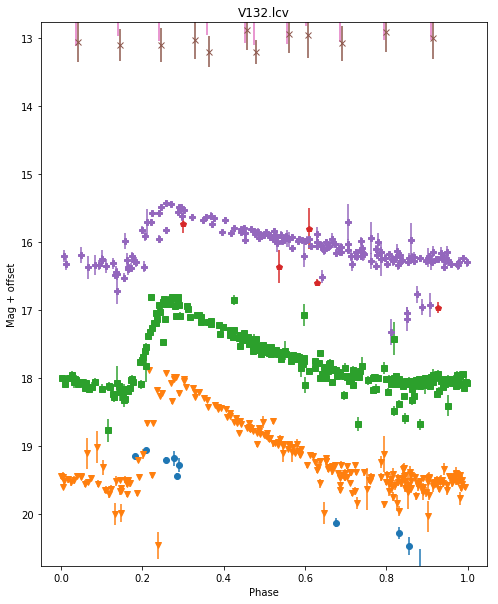

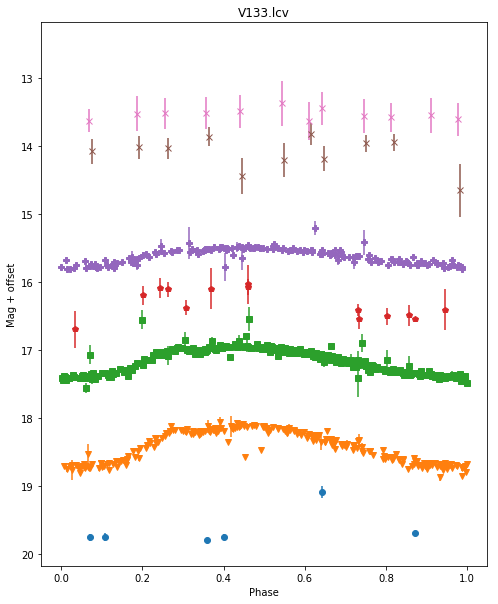

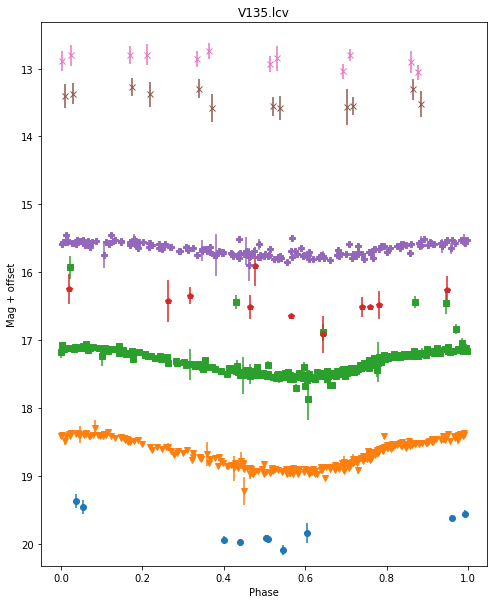

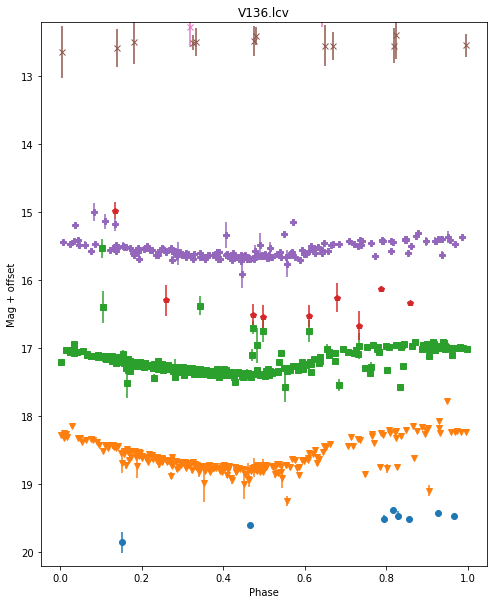

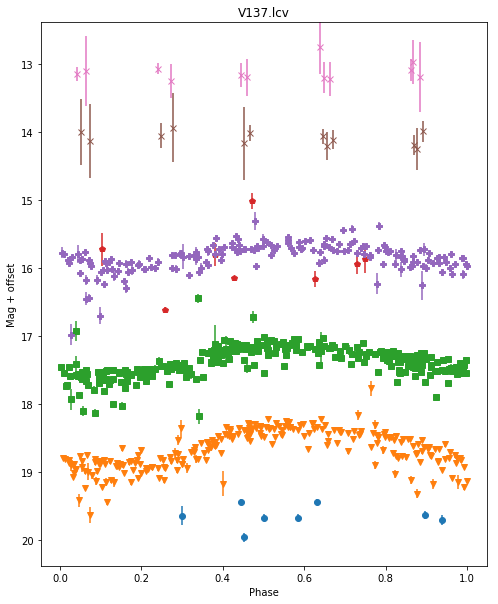

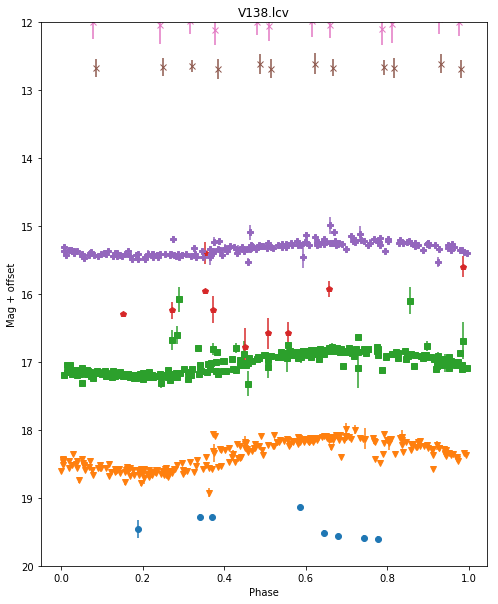

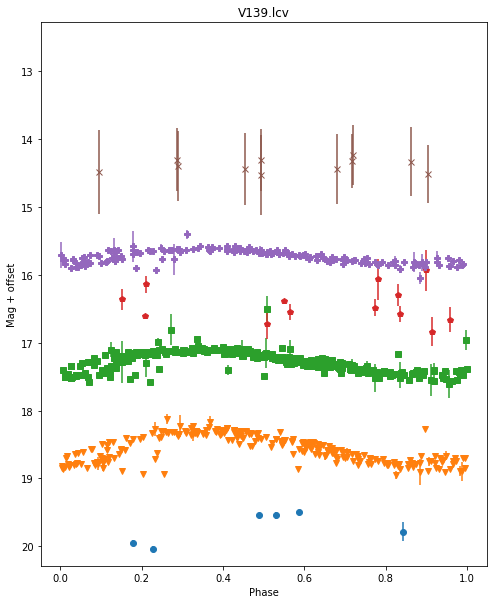

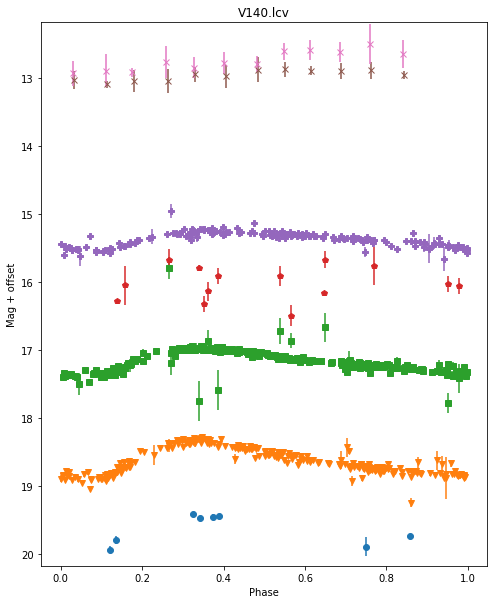

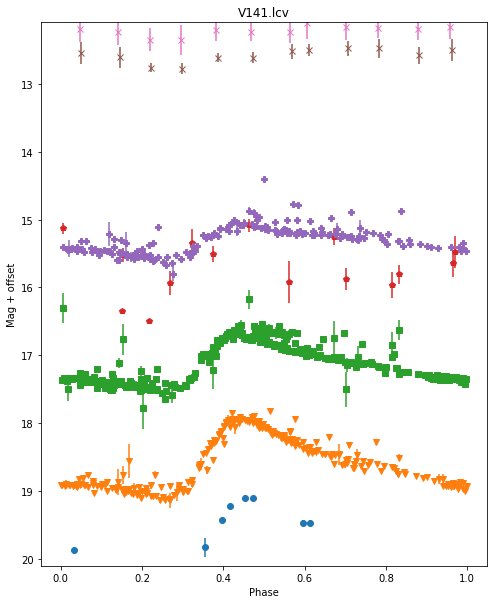

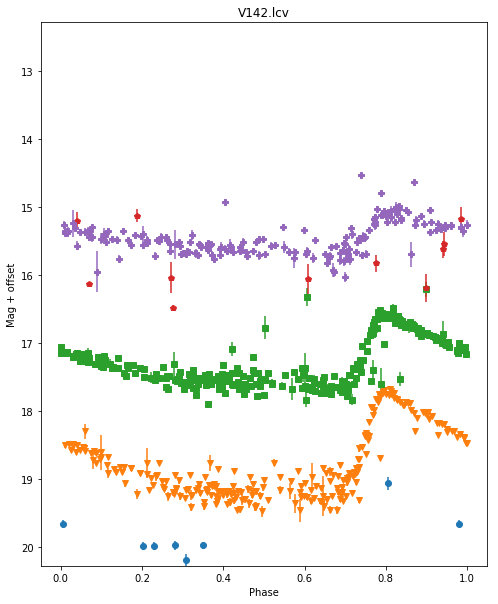

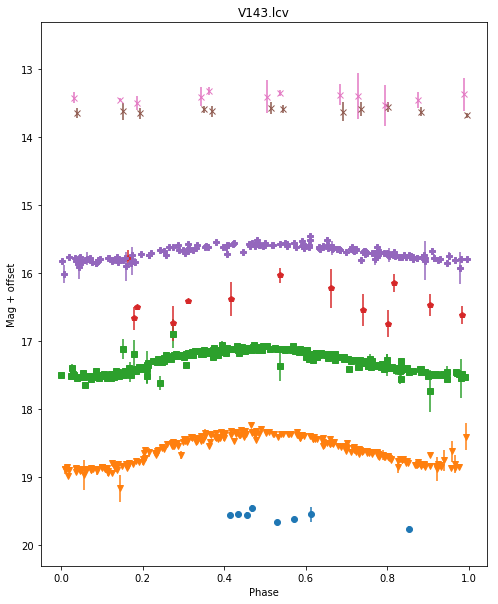

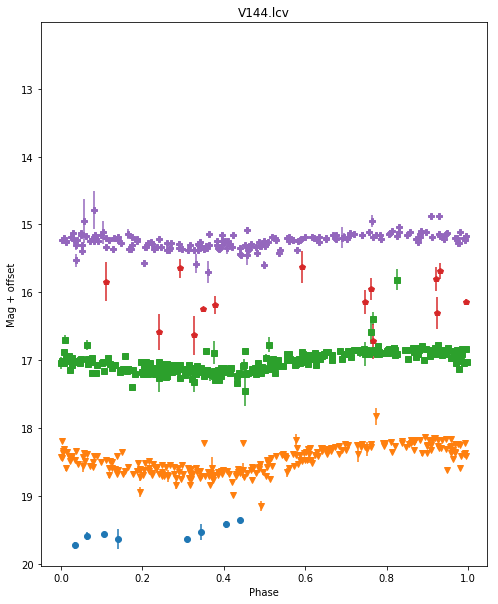

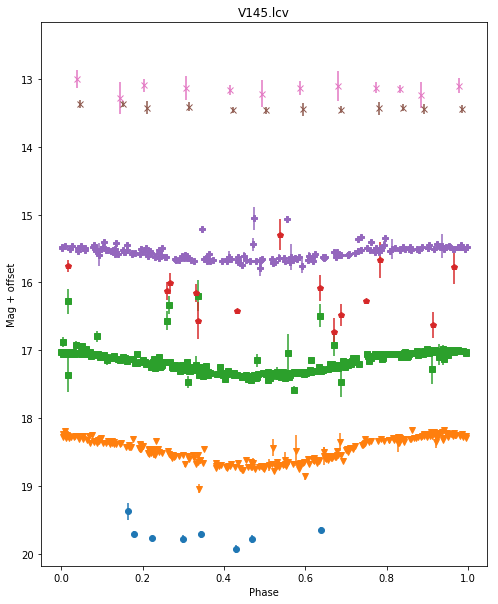

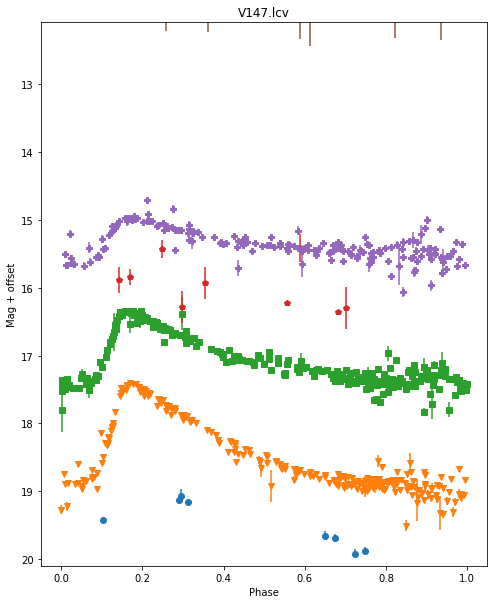

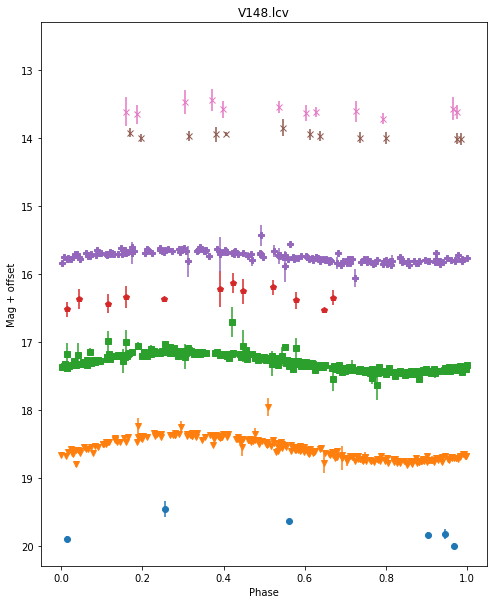

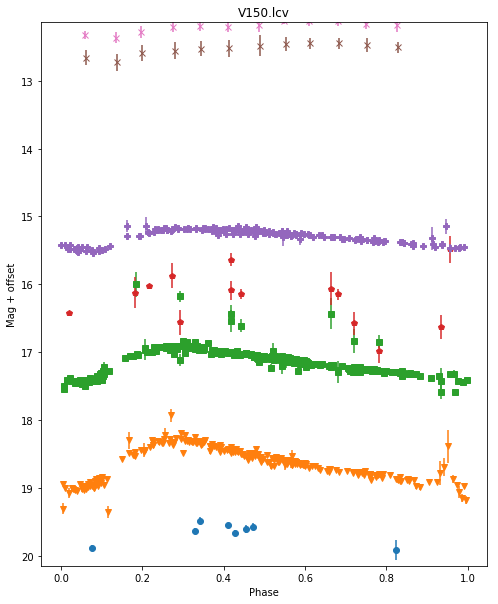

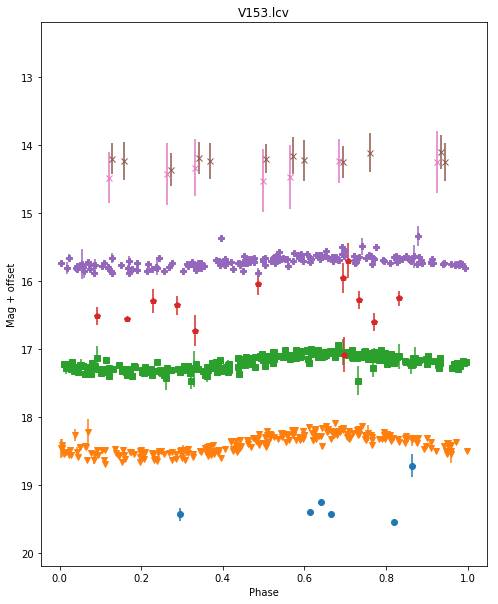

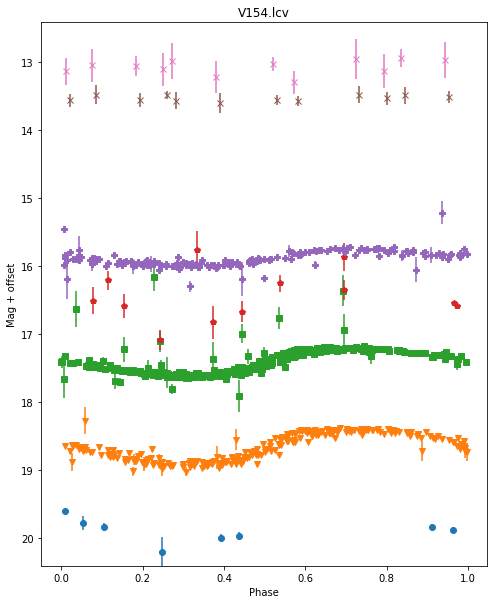

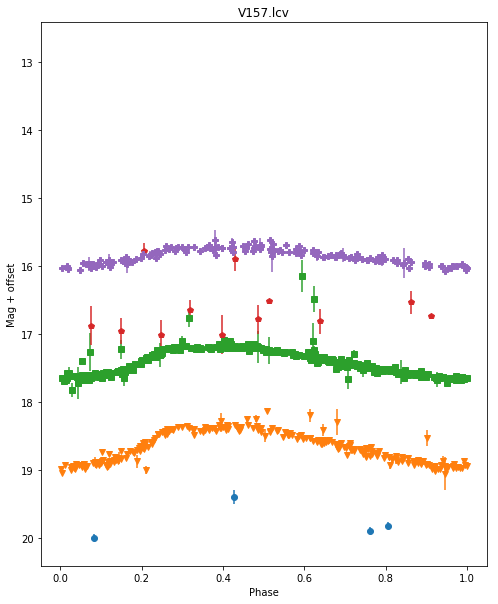

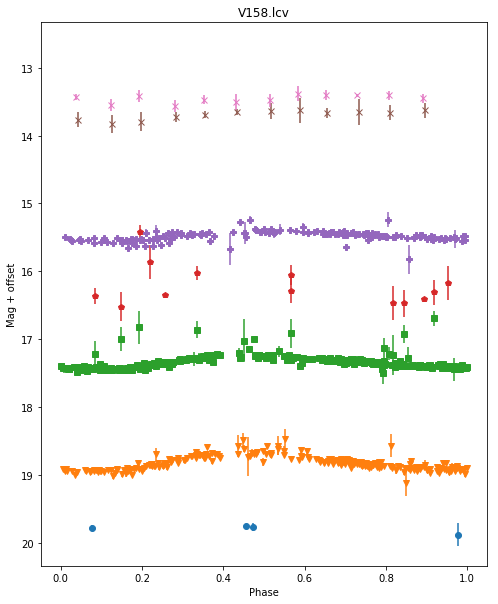

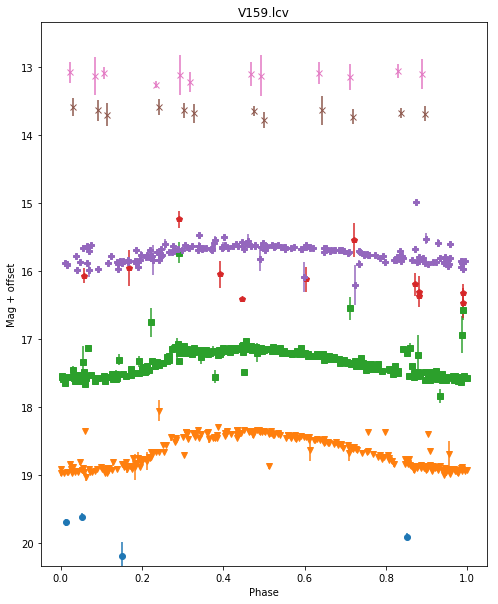

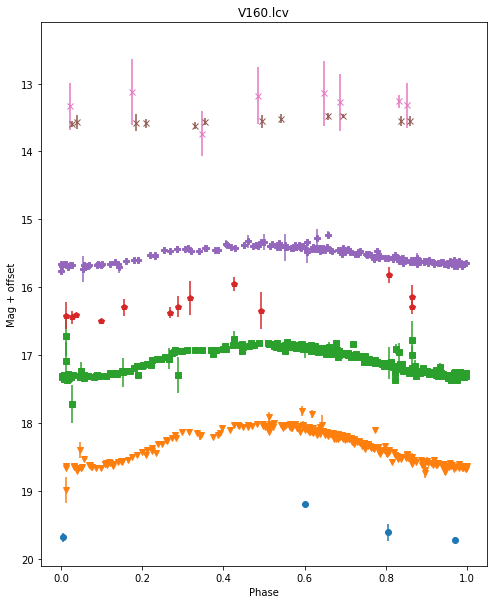

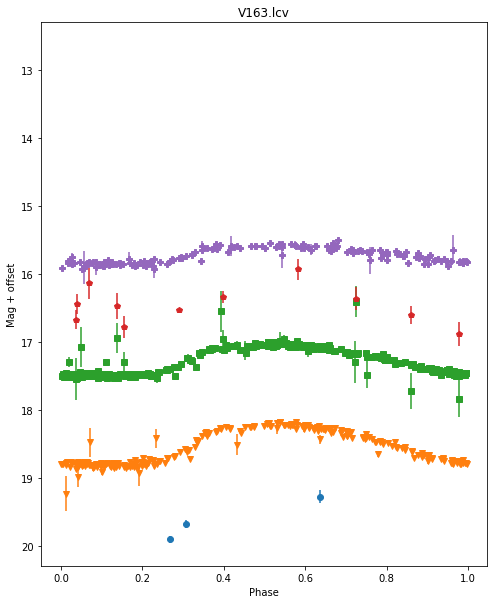

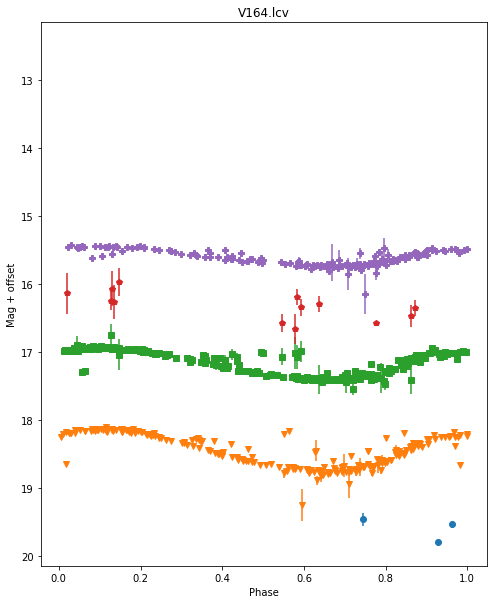

In [6]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, data_dir=folder)
        else:
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, data_dir=folder)
    except:
        print star, ' not found.'
        continue

## Fit light curves

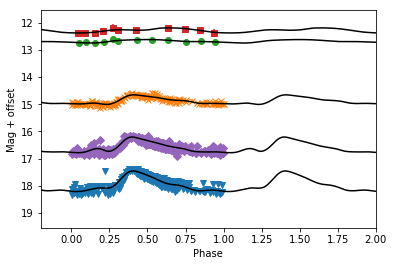

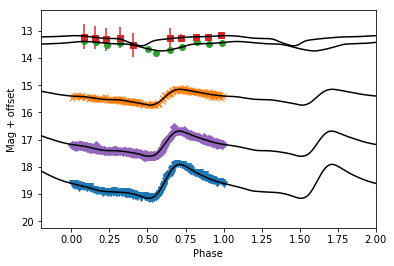

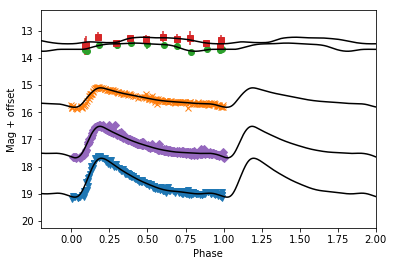

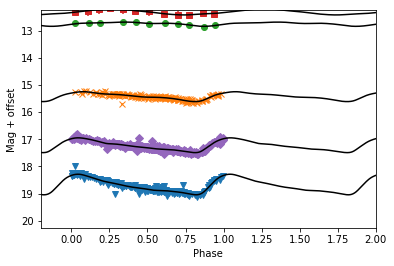

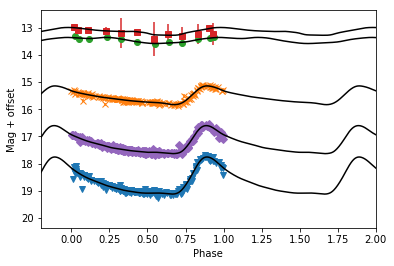

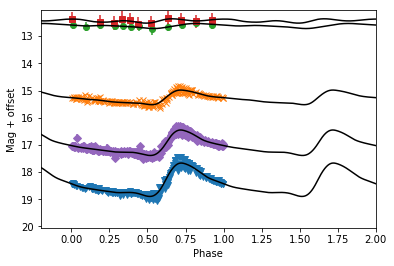

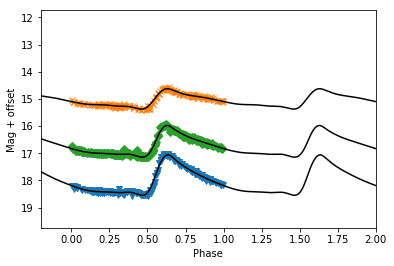

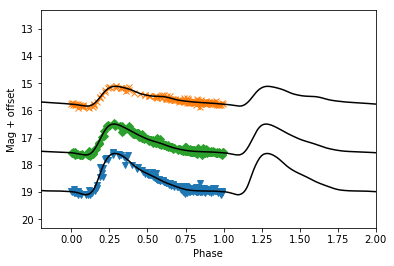

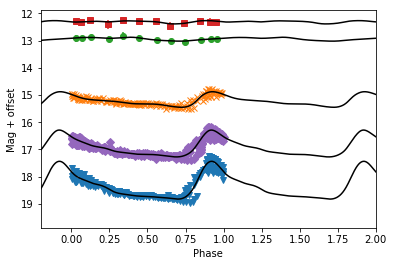

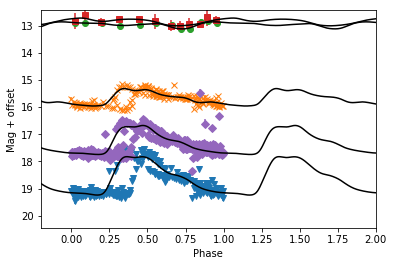

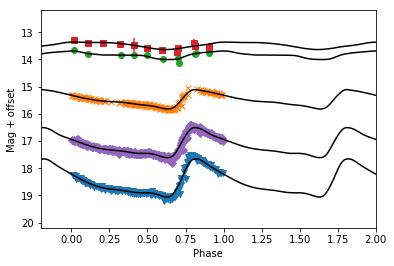

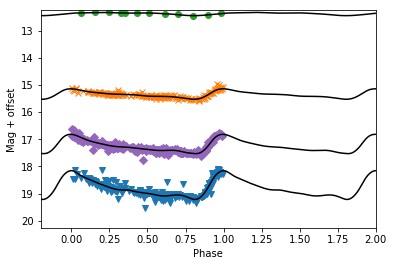

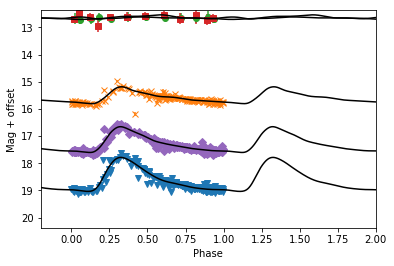

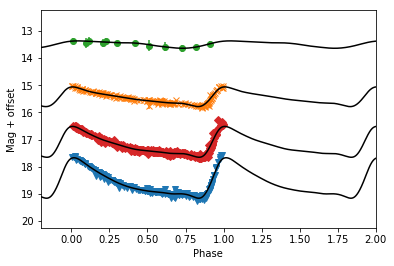

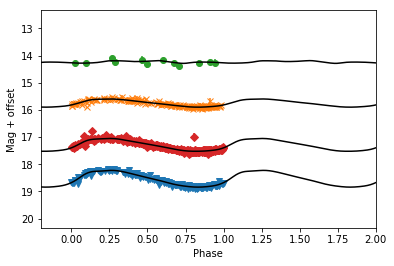

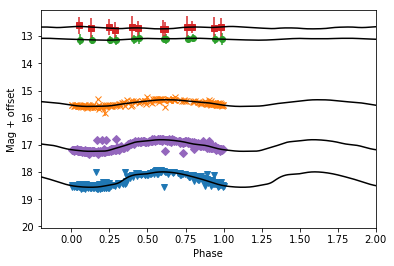

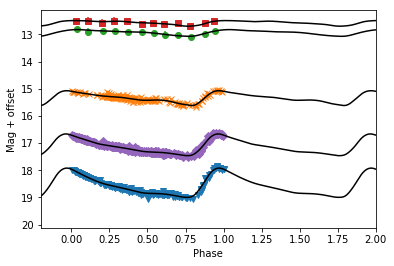

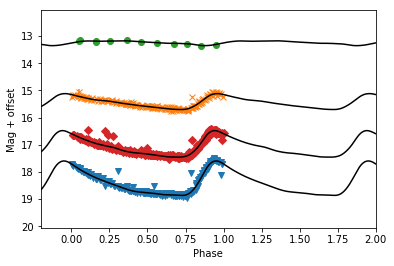

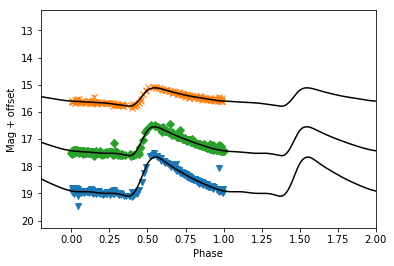

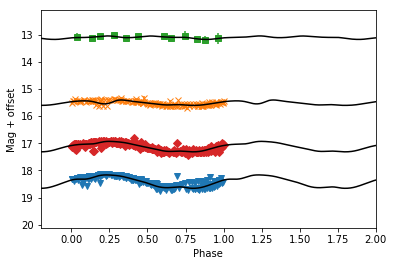

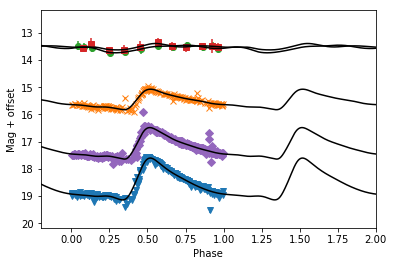

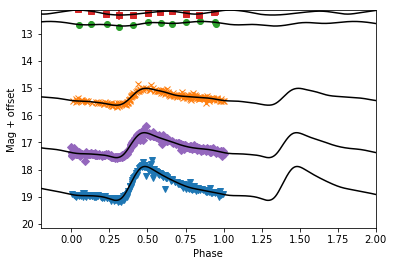

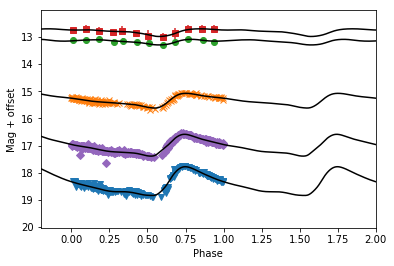

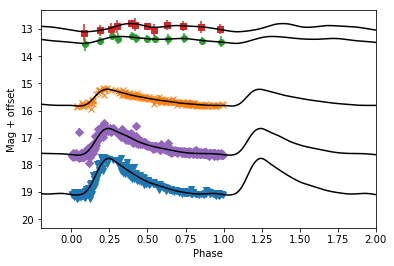

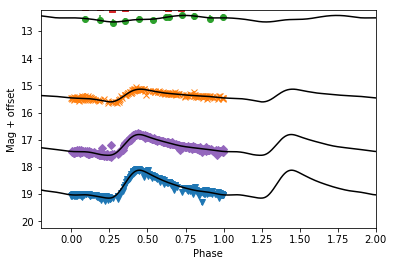

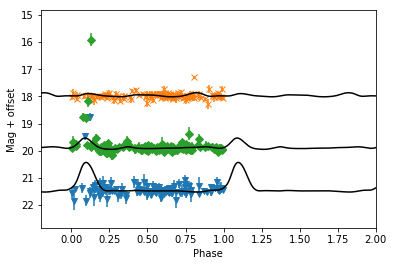

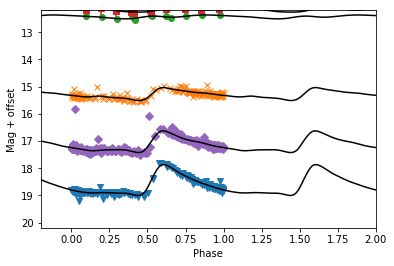

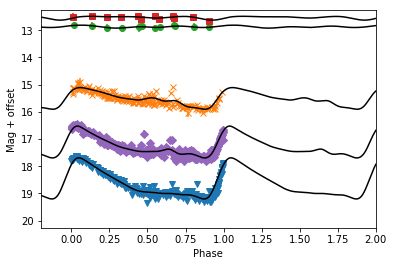

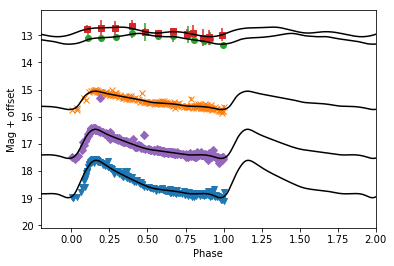

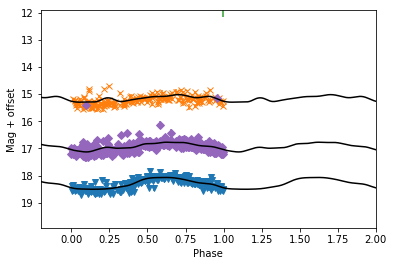

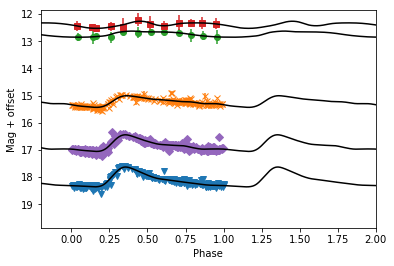

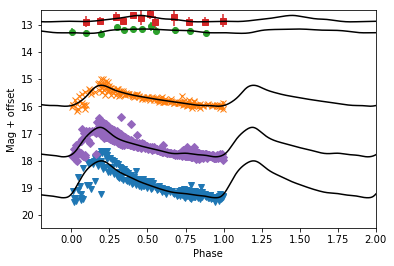

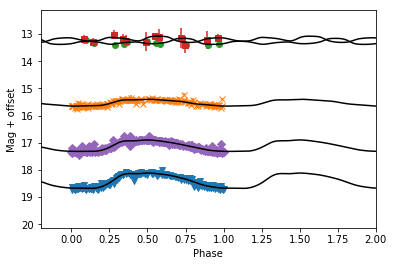

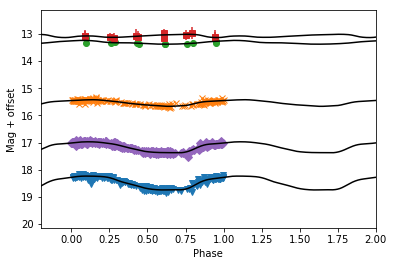

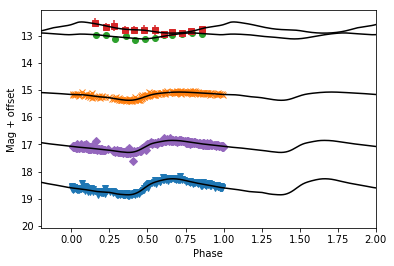

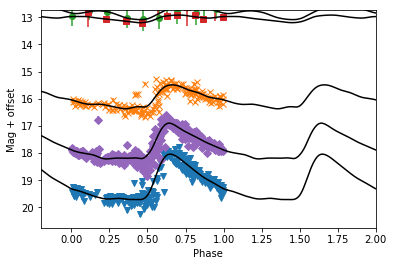

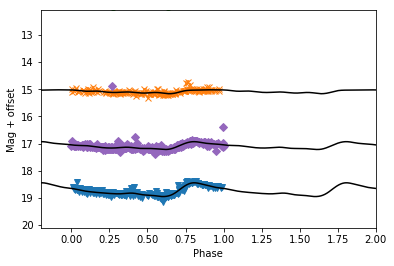

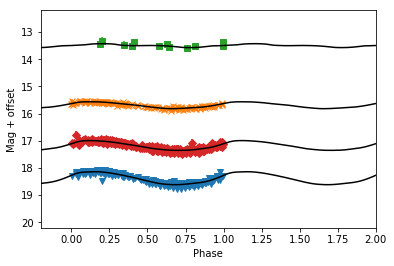

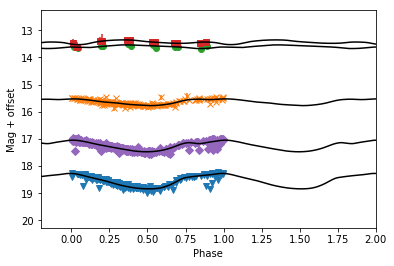

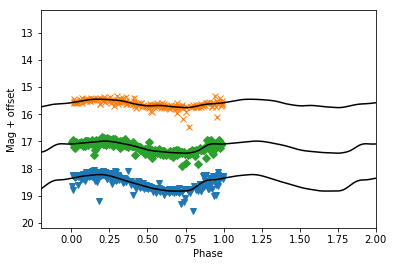

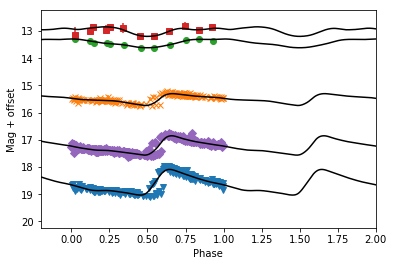

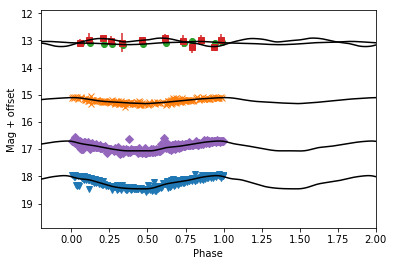

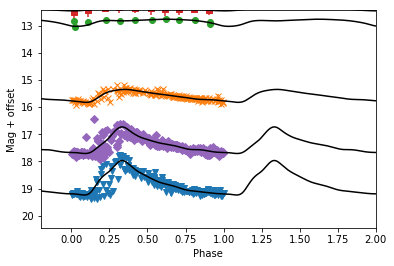

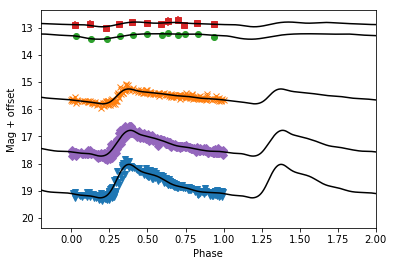

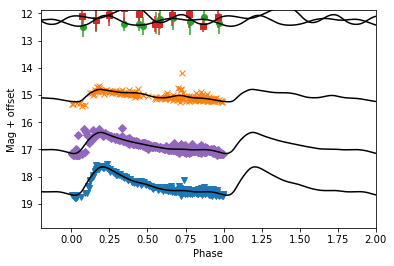

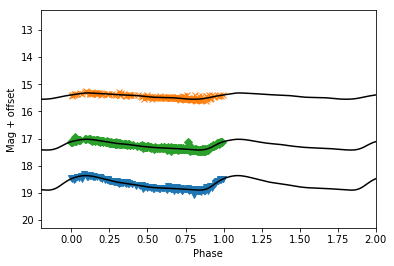

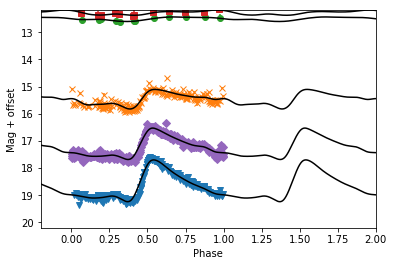

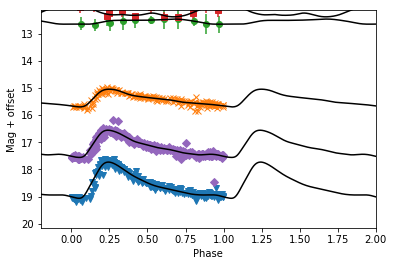

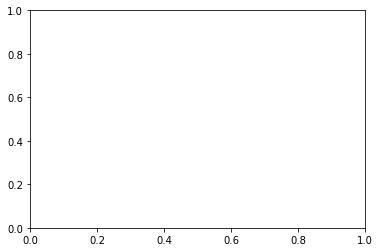

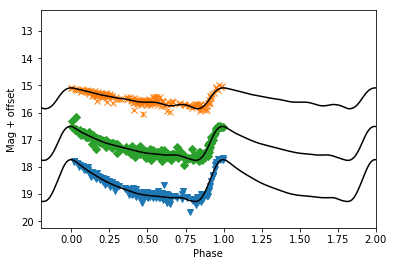

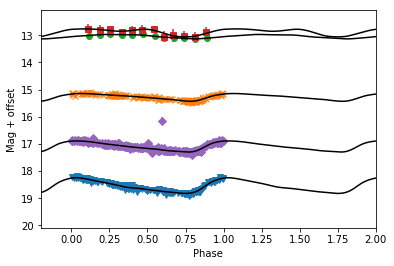

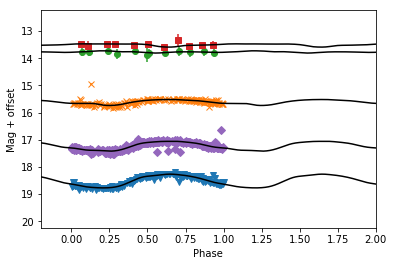

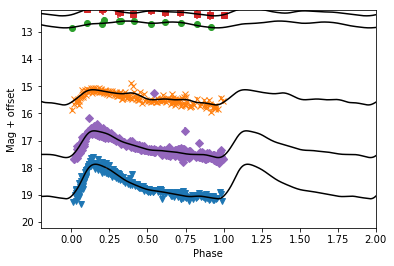

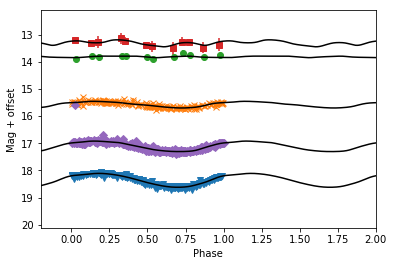

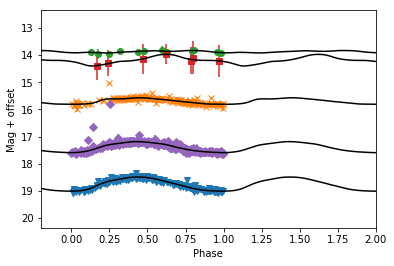

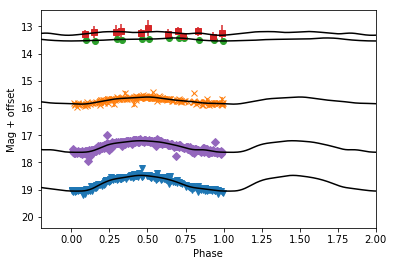

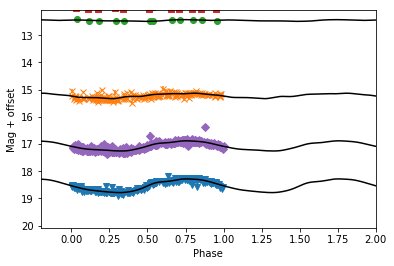

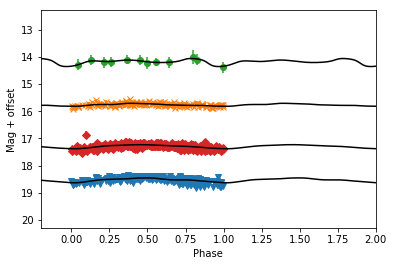

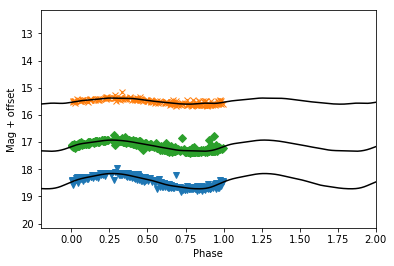

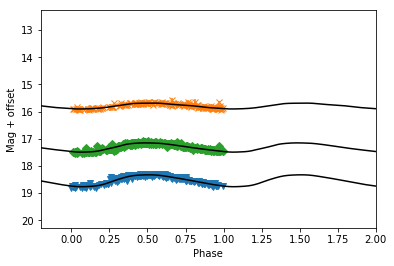

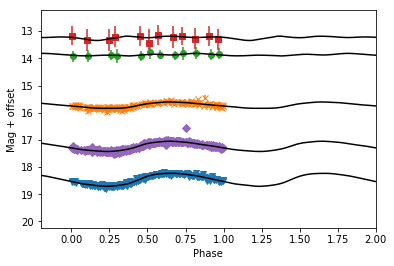

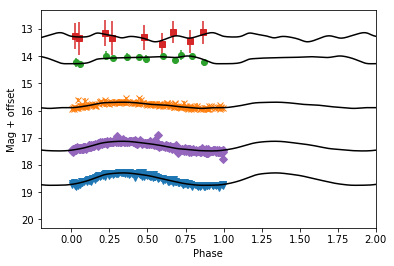

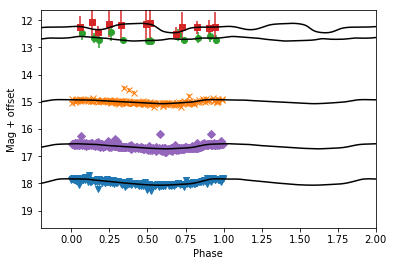

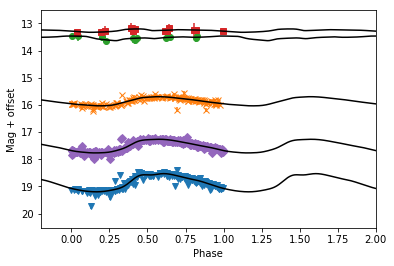

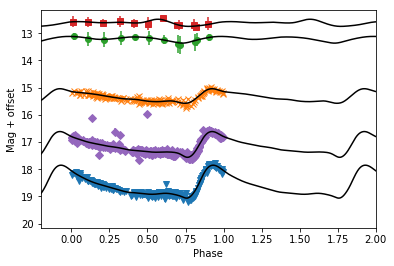

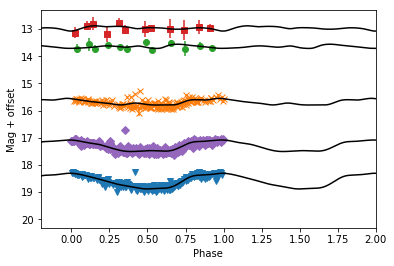

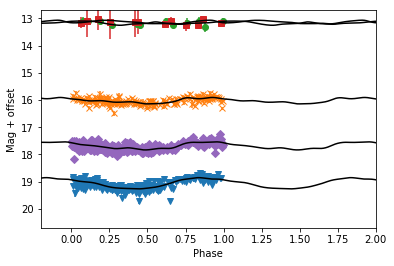

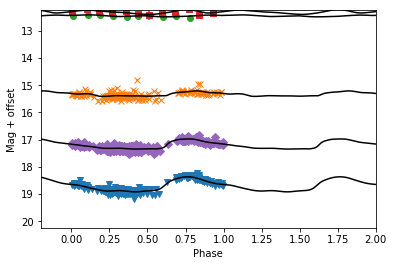

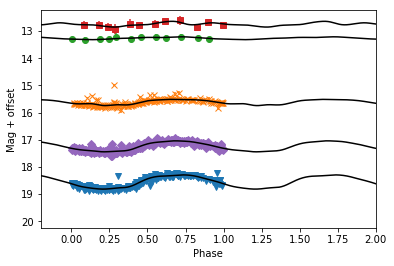

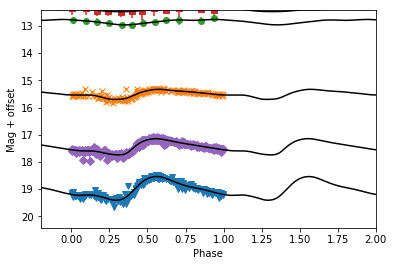

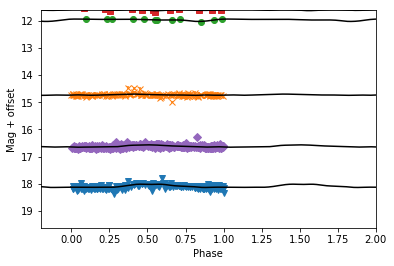

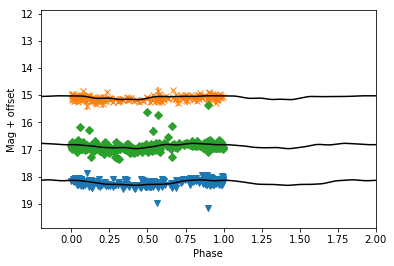

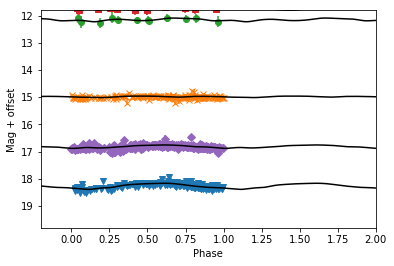

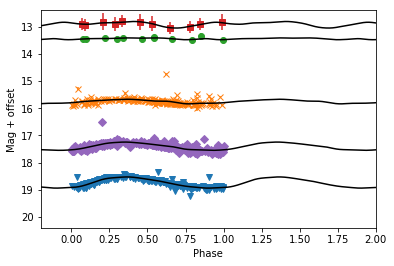

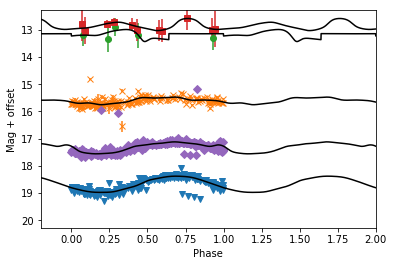

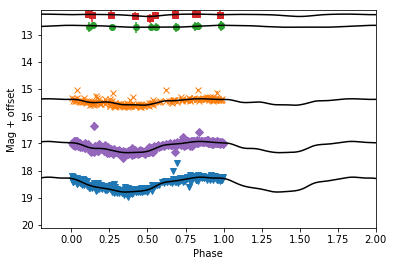

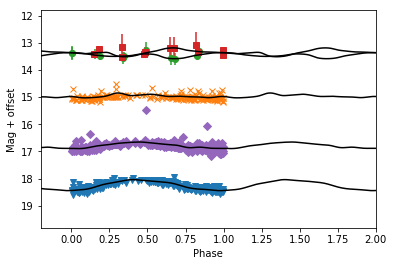

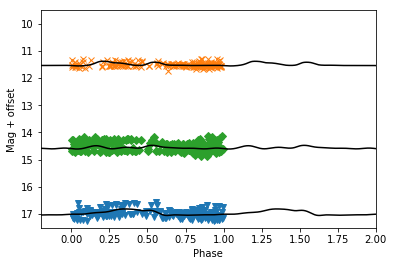

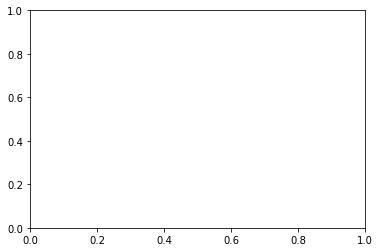

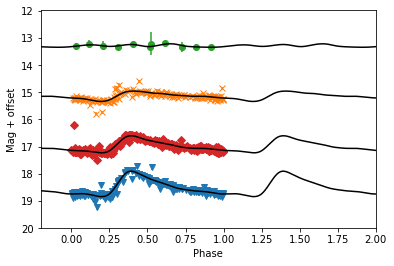

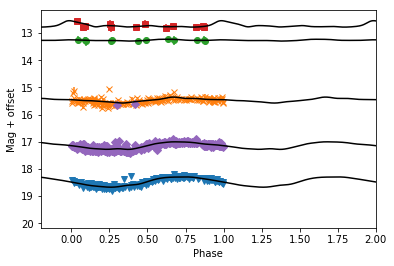

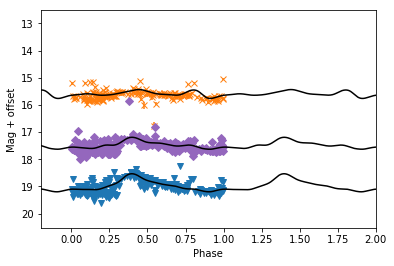

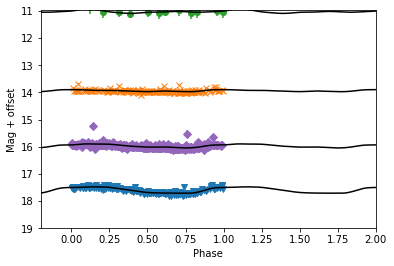

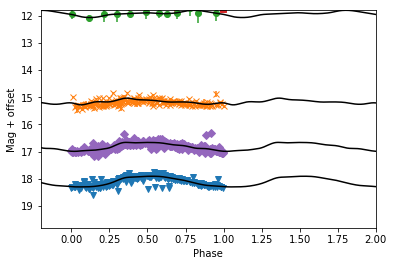

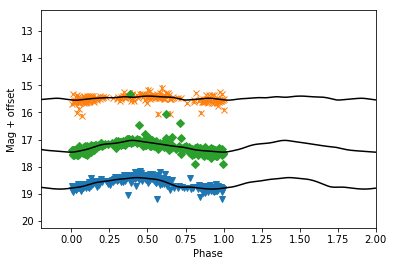

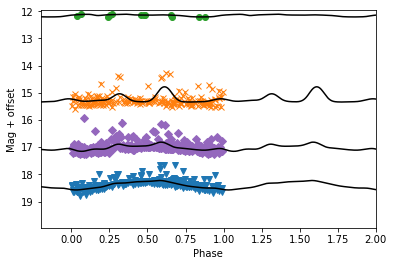

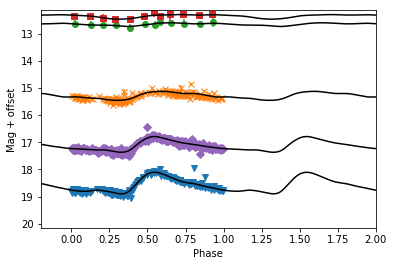

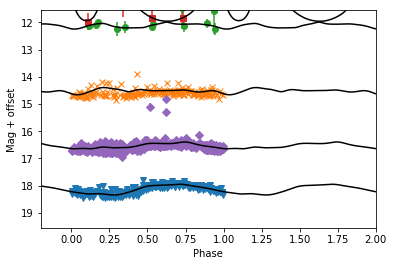

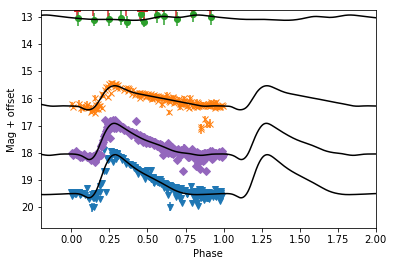

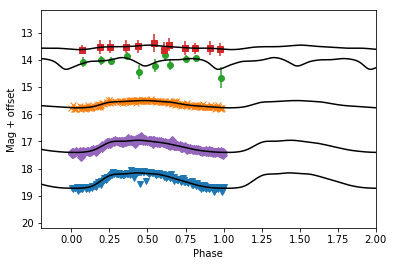

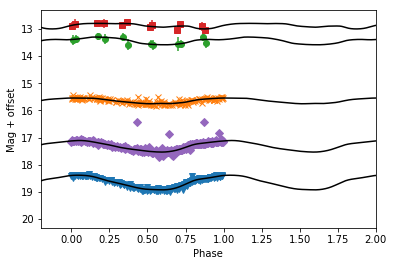

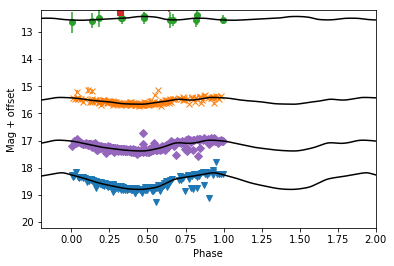

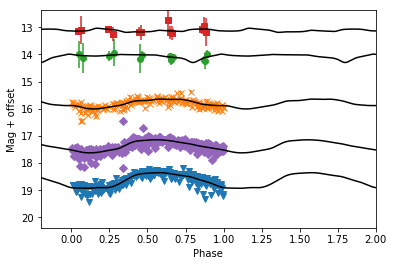

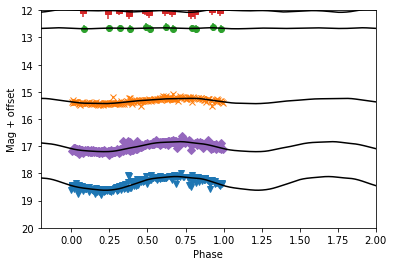

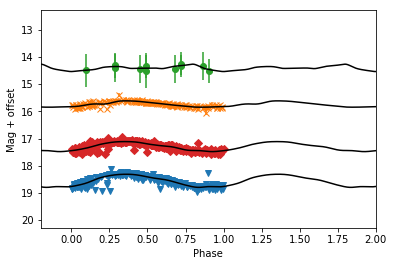

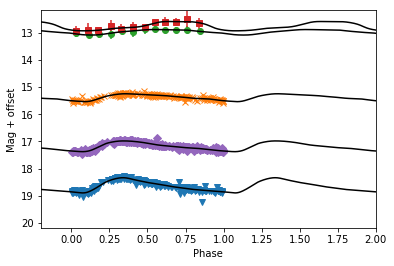

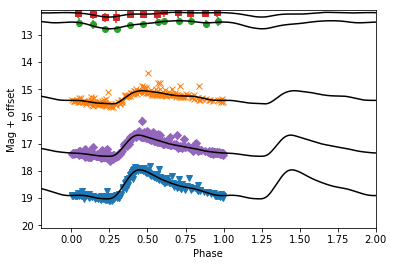

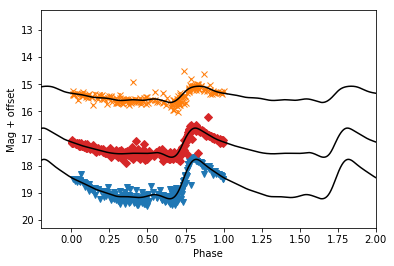

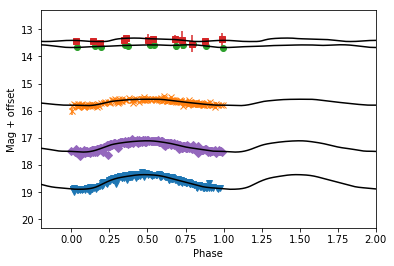

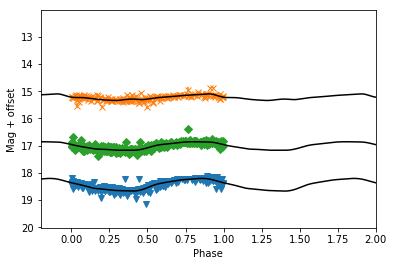

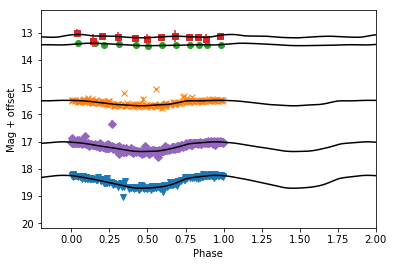

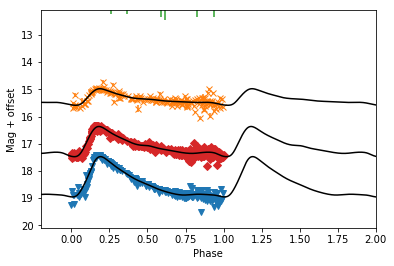

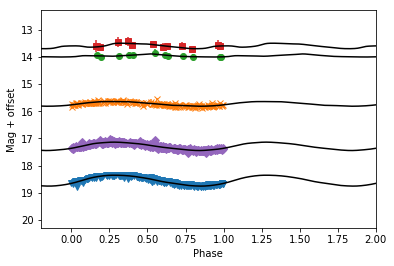

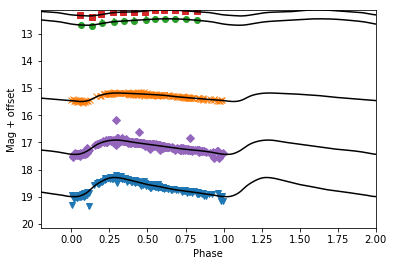

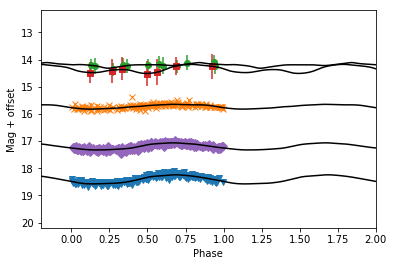

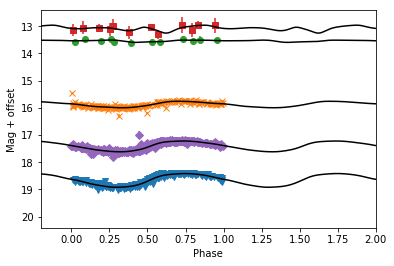

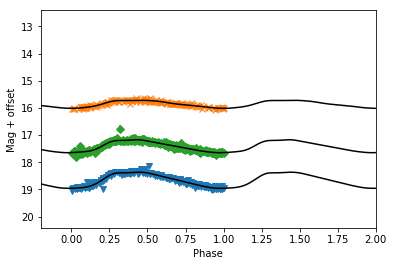

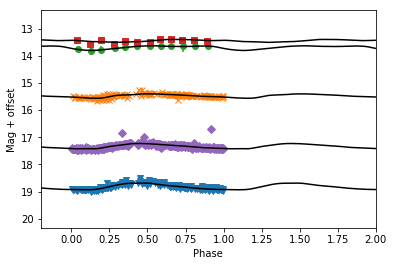

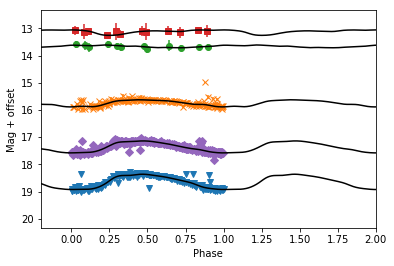

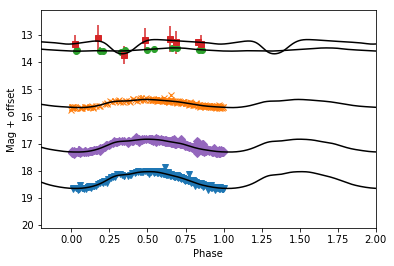

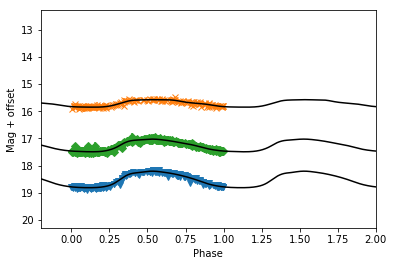

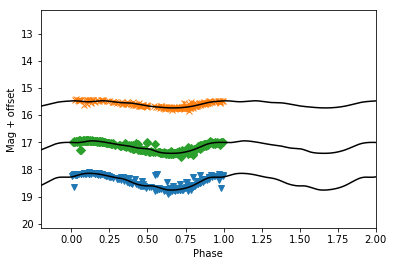

In [3]:
dtype1 = np.dtype([('id', 'S5'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables-new.txt', dtype=dtype1, usecols=(0,1,2))
f = open(folder+'avg_mags.txt', 'w')

for ind, star in enumerate(data['id']):
    try:
        if data['new_period'][ind] == np.nan: 
            continue
        filters, avgmag, err, amp, sigma = lightcurves.gloess(folder+'lcvs/'+star+'.phased', ask=0, master_plot=1, clean=1)
        datasave = np.array(zip(np.repeat(star, len(filters)),filters, np.repeat(data['new_period'][ind], len(filters)), avgmag, err, amp, sigma), dtype=[('c1', 'S5'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float), ('c7', float)])
        np.savetxt(f, datasave, fmt='%5s %2s %10.8f %6.3f %6.4f %4.2f %4.2f')
    except:
        continue
        print 'Star '+star+' failed.'
f.close()

/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in divide


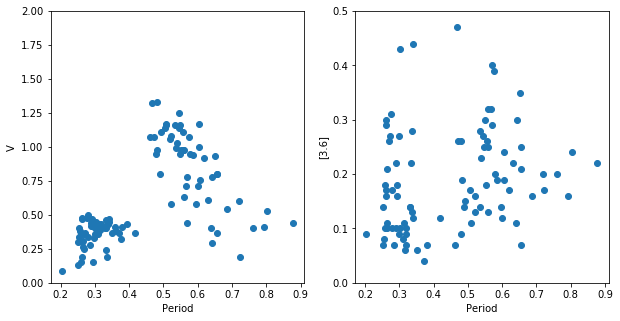

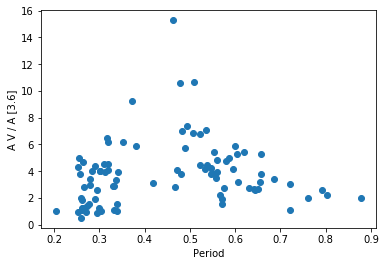

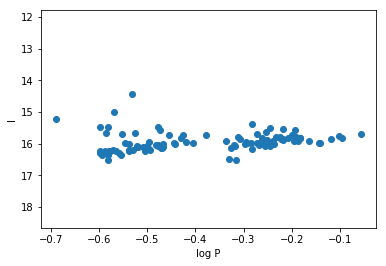

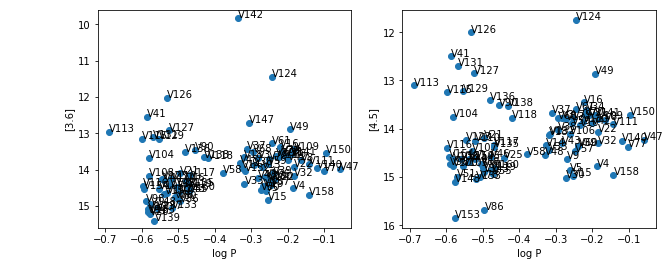

In [4]:
dtype = np.dtype([('star', 'S5'), ('filt', 'S2'), ('period', float), ('avg', float), ('amp', float)])
data = np.loadtxt(folder+'avg_mags.txt', dtype=dtype, usecols=(0,1,2,3,5))

perV = data['period'][data['filt'] == 'V']
perI1 = data['period'][data['filt'] == 'I1']
perI2 = data['period'][data['filt'] == 'I2']
Vamp = data['amp'][data['filt'] == 'V']
I1amp = data['amp'][data['filt'] == 'I1']
I2amp = data['amp'][data['filt'] == 'I2']
I1 = data['avg'][data['filt'] == 'I1']
I2 = data['avg'][data['filt'] == 'I2']
V = data['avg'][data['filt'] == 'V']

# Bailey diagram
fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(perV[V > 0], Vamp[V > 0], 'o')
ax.set_ylim((0,2))
ax.set_xlabel('Period')
ax.set_ylabel('V')
ax2 = fig.add_subplot(122)
ax2.plot(perI1[I1 > 0], I1amp[I1 > 0], 'o')
ax2.set_ylim((0,0.5))
ax2.set_xlabel('Period')
ax2.set_ylabel('[3.6]')


# amplitude ratio 

R_amp = Vamp/I1amp
fig3 = mp.figure()
ax4 = fig3.add_subplot(111)
ax4.plot(perV, R_amp, 'o')
ax4.set_xlabel('Period')
ax4.set_ylabel('A V / A [3.6]')

# I band PL relation
fig5 = mp.figure()
ax5 = fig5.add_subplot(111)
Iper = data['period'][data['filt'] == 'I']
I = data['avg'][data['filt'] == 'I']
ax5.plot(np.log10(Iper[I > 0]), I[I > 0], 'o')
ax5.set_ylim((np.max(I[I > 0])+0.2,np.min(I[I>0])-0.2))
ax5.set_xlabel('log P')
ax5.set_ylabel('I')

# IRAC PL relation
fig2 = mp.figure(figsize=(10,4))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
ax1.plot(np.log10(perI1[I1 > 0]), I1[I1 > 0], 'o')
ax1.set_ylim((np.max(I1[I1 > 0])+0.2,np.min(I1[I1 > 0])-0.2))
ax1.set_xlabel('log P')
ax1.set_ylabel('[3.6]')
ax2.plot(np.log10(perI2[I2 > 0]), I2[I2 > 0], 'o')
ax2.set_ylim((np.max(I2[I2 > 0])+0.2,np.min(I2[I2 > 0])-0.2))
ax2.set_xlabel('log P')
ax2.set_ylabel('[4.5]')

I1_labels = data['star'][data['filt'] == 'I1']
for label, x, y in zip(I1_labels, np.log10(perI1), I1):
    ax1.annotate(label, xy=(x, y))

I2_labels = data['star'][data['filt'] == 'I2']
for label, x, y in zip(I2_labels, np.log10(perI2), I2):
    ax2.annotate(label, xy=(x, y))

['V16' 'V18' 'V31' 'V34' 'V37' 'V41' 'V48' 'V49' 'V61' 'V68' 'V70' 'V90'
 'V108' 'V109' 'V111' 'V113' 'V115' 'V124' 'V126' 'V127' 'V129' 'V132'
 'V136' 'V141' 'V142' 'V147' 'V150']


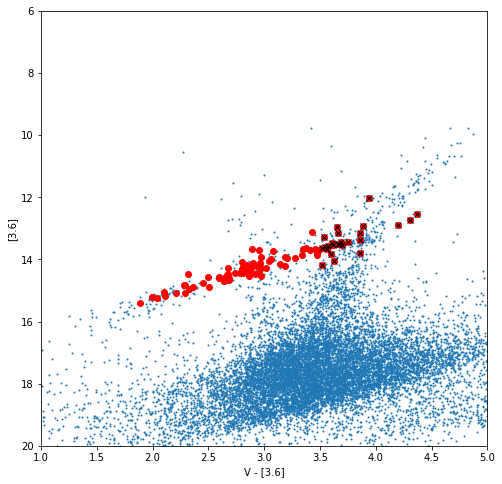

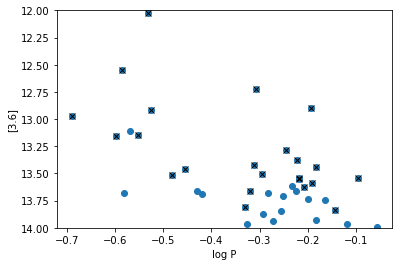

In [7]:
 catalog_data = analysis_routines.read_merged_catalog(folder)

thres = 300
thres2 = 120
dist = catalog_data['rad_dist']
colorVIR = catalog_data['V'][dist > thres2] - catalog_data['3.6'][dist > thres2]
mag = catalog_data['V'][dist > thres2]
magIR = catalog_data['3.6'][dist > thres2]
err = catalog_data['3.6er'][dist > thres2]

good_mag = mag[err < 0.2]
good_color = colorVIR[err < 0.2]

fig2 = mp.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111)
ax2.scatter(colorVIR, magIR, s=1, edgecolor=None)
ax2.set_ylim((20,6))
ax2.set_xlim((1,5))
ax2.set_xlabel('V - [3.6]')
ax2.set_ylabel('[3.6]')

dtype = np.dtype([('star', 'S5'), ('filt', 'S2'), ('period', float), ('avg', float), ('amp', float)])
data = np.loadtxt(folder+'avg_mags.txt', dtype=dtype, usecols=(0,1,2,3,4))

var_color = data['avg'][data['filt'] == 'V'] - data['avg'][data['filt'] == 'I1']
var_mag = data['avg'][data['filt'] == 'I1']
var_id = data['star'][data['filt'] == 'I1']
var_period = data['period'][data['filt'] == 'I1']

bad_id = np.array([])
bad_color = np.array([])
bad_mag = np.array([])
bad_per = np.array([])
for ind, star in enumerate(var_id):
    if var_color[ind] >= 3.5 and var_mag[ind] > 1 : 
        bad_id = np.append(bad_id, star)
        bad_color = np.append(bad_color, var_color[ind])
        bad_mag = np.append(bad_mag, var_mag[ind])
        bad_per = np.append(bad_per, var_period[ind])
        
print bad_id
ax2.plot(var_color, var_mag, 'o', color='r')
ax2.plot(bad_color, bad_mag, 'x', color='k')

fig3 = mp.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(np.log10(var_period), var_mag, 'o')
ax3.plot(np.log10(bad_per), bad_mag, 'x', color='k')
ax3.set_ylim((14,12))
ax3.set_xlabel('log P')
ax3.set_ylabel('[3.6]')